# Load and understanding the data

In [1]:
# import pandas
import pandas as pd              
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',1000)

# define support function
def inspect_data(df, col=None, n_rows=5):
    # check data shape
    print(f'data shape: {df.shape}')
    
    # define columns
    if col is None:
        col = df.columns
    
    # check data head, use display function to display dataframe
    display(df[col].head(n_rows))
    
def check_missing(df, cut_off=0, sort=True):
    freq=df.isnull().sum()
    percent=df.isnull().sum()/df.shape[0]*100
    types=df.dtypes
    unique=df.apply(pd.unique).to_frame(name='Unique Values')['Unique Values']
    unique_counts = df.nunique(dropna=False)
    df_miss=pd.DataFrame({'missing_percentage':percent,'missing_frequency':freq,'types':types,'count_value':unique_counts,
                          'unique_values':unique})
    if sort:df_miss.sort_values(by='missing_frequency',ascending=False, inplace=True)
    return df_miss[df_miss['missing_percentage']>=cut_off]

# load file
# app_test = pd.read_csv('application_test.csv')
app_train = pd.read_csv('application_train.csv')
# bureau = pd.read_csv('bureau.csv')
# bur_bal = pd.read_csv('bureau_balance.csv')
# cc_bal = pd.read_csv('credit_card_balance.csv')
# ins_pay = pd.read_csv('installments_payments.csv')
# pc_bal = pd.read_csv('POS_CASH_balance.csv')
# prev_app = pd.read_csv('previous_application.csv')
# samp_sub = pd.read_csv('sample_submission.csv')

In [2]:
inspect_data(app_train)

data shape: (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
check_missing(app_train)

,missing_percentage,missing_frequency,types,count_value,unique_values
COMMONAREA_MEDI,69.872297,214865,float64,3203,"[0.0144, 0.0608, nan, 0.0585, 0.115, 0.0018, 0..."
COMMONAREA_AVG,69.872297,214865,float64,3182,"[0.0143, 0.0605, nan, 0.0582, 0.1143, 0.0018, ..."
COMMONAREA_MODE,69.872297,214865,float64,3129,"[0.0144, 0.0497, nan, 0.0587, 0.1153, 0.0018, ..."
NONLIVINGAPARTMENTS_MODE,69.432963,213514,float64,168,"[0.0, nan, 0.0195, 0.0078, 0.0039, 0.0661, 0.1..."
NONLIVINGAPARTMENTS_AVG,69.432963,213514,float64,387,"[0.0, 0.0039, nan, 0.0193, 0.0077, 0.0019, 0.0..."
NONLIVINGAPARTMENTS_MEDI,69.432963,213514,float64,215,"[0.0, 0.0039, nan, 0.0194, 0.0078, 0.0019, 0.0..."
FONDKAPREMONT_MODE,68.386172,210295,object,5,"[reg oper account, nan, org spec account, reg ..."
LIVINGAPARTMENTS_MODE,68.354953,210199,float64,737,"[0.022, 0.079, nan, 0.1313, 0.3113, 0.0248, 0...."
LIVINGAPARTMENTS_AVG,68.354953,210199,float64,1869,"[0.0202, 0.0773, nan, 0.1202, 0.2849, 0.0227, ..."
LIVINGAPARTMENTS_MEDI,68.354953,210199,float64,1098,"[0.0205, 0.0787, nan, 0.1223, 0.2899, 0.0231, ..."


# Feature engineering and selection

In [4]:
# drop column who have high threshold of missing value (20% or more)
threshold = len(app_train) * 0.8
model_base = app_train.dropna(axis=1, thresh=threshold)

In [5]:
inspect_data(model_base)

data shape: (307511, 72)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
check_missing(model_base)

,missing_percentage,missing_frequency,types,count_value,unique_values
EXT_SOURCE_3,19.825307,60965,float64,815,"[0.1393757800997895, nan, 0.7295666907060153, ..."
AMT_REQ_CREDIT_BUREAU_YEAR,13.501631,41519,float64,26,"[1.0, 0.0, nan, 2.0, 4.0, 5.0, 3.0, 8.0, 6.0, ..."
AMT_REQ_CREDIT_BUREAU_QRT,13.501631,41519,float64,12,"[0.0, nan, 1.0, 2.0, 4.0, 3.0, 8.0, 5.0, 6.0, ..."
AMT_REQ_CREDIT_BUREAU_MON,13.501631,41519,float64,25,"[0.0, nan, 1.0, 2.0, 6.0, 5.0, 3.0, 7.0, 9.0, ..."
AMT_REQ_CREDIT_BUREAU_WEEK,13.501631,41519,float64,10,"[0.0, nan, 1.0, 3.0, 2.0, 4.0, 5.0, 6.0, 8.0, ..."
AMT_REQ_CREDIT_BUREAU_DAY,13.501631,41519,float64,10,"[0.0, nan, 1.0, 3.0, 2.0, 4.0, 5.0, 6.0, 9.0, ..."
AMT_REQ_CREDIT_BUREAU_HOUR,13.501631,41519,float64,6,"[0.0, nan, 1.0, 2.0, 3.0, 4.0]"
NAME_TYPE_SUITE,0.420148,1292,object,8,"[Unaccompanied, Family, Spouse, partner, Child..."
DEF_60_CNT_SOCIAL_CIRCLE,0.332021,1021,float64,10,"[2.0, 0.0, 1.0, nan, 3.0, 5.0, 4.0, 7.0, 24.0,..."
OBS_30_CNT_SOCIAL_CIRCLE,0.332021,1021,float64,34,"[2.0, 1.0, 0.0, 4.0, 8.0, 10.0, nan, 7.0, 3.0,..."


In [7]:
# drop column realted to 'EXT_SOURCE_1' column
model_base = model_base.drop(columns=['EXT_SOURCE_3','EXT_SOURCE_2'])

In [8]:
inspect_data(model_base)

data shape: (307511, 70)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# drop column who have all unique value
unique_cols = [col for col in model_base.columns if model_base[col].nunique() == len(model_base)]
model_base = model_base.drop(columns=unique_cols)

In [10]:
inspect_data(model_base)

data shape: (307511, 69)


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
check_missing(model_base)

,missing_percentage,missing_frequency,types,count_value,unique_values
AMT_REQ_CREDIT_BUREAU_YEAR,13.501631,41519,float64,26,"[1.0, 0.0, nan, 2.0, 4.0, 5.0, 3.0, 8.0, 6.0, ..."
AMT_REQ_CREDIT_BUREAU_QRT,13.501631,41519,float64,12,"[0.0, nan, 1.0, 2.0, 4.0, 3.0, 8.0, 5.0, 6.0, ..."
AMT_REQ_CREDIT_BUREAU_MON,13.501631,41519,float64,25,"[0.0, nan, 1.0, 2.0, 6.0, 5.0, 3.0, 7.0, 9.0, ..."
AMT_REQ_CREDIT_BUREAU_WEEK,13.501631,41519,float64,10,"[0.0, nan, 1.0, 3.0, 2.0, 4.0, 5.0, 6.0, 8.0, ..."
AMT_REQ_CREDIT_BUREAU_DAY,13.501631,41519,float64,10,"[0.0, nan, 1.0, 3.0, 2.0, 4.0, 5.0, 6.0, 9.0, ..."
AMT_REQ_CREDIT_BUREAU_HOUR,13.501631,41519,float64,6,"[0.0, nan, 1.0, 2.0, 3.0, 4.0]"
NAME_TYPE_SUITE,0.420148,1292,object,8,"[Unaccompanied, Family, Spouse, partner, Child..."
DEF_30_CNT_SOCIAL_CIRCLE,0.332021,1021,float64,11,"[2.0, 0.0, 1.0, nan, 3.0, 4.0, 5.0, 6.0, 7.0, ..."
OBS_60_CNT_SOCIAL_CIRCLE,0.332021,1021,float64,34,"[2.0, 1.0, 0.0, 4.0, 8.0, 10.0, nan, 7.0, 3.0,..."
DEF_60_CNT_SOCIAL_CIRCLE,0.332021,1021,float64,10,"[2.0, 0.0, 1.0, nan, 3.0, 5.0, 4.0, 7.0, 24.0,..."


In [12]:
# drop column with only 1 unique value
single_value_cols = [col for col in model_base.columns if model_base[col].nunique() == 1]
model_base = model_base.drop(columns=single_value_cols)

In [13]:
inspect_data(model_base)

data shape: (307511, 69)


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
check_missing(model_base)

,missing_percentage,missing_frequency,types,count_value,unique_values
AMT_REQ_CREDIT_BUREAU_YEAR,13.501631,41519,float64,26,"[1.0, 0.0, nan, 2.0, 4.0, 5.0, 3.0, 8.0, 6.0, ..."
AMT_REQ_CREDIT_BUREAU_QRT,13.501631,41519,float64,12,"[0.0, nan, 1.0, 2.0, 4.0, 3.0, 8.0, 5.0, 6.0, ..."
AMT_REQ_CREDIT_BUREAU_MON,13.501631,41519,float64,25,"[0.0, nan, 1.0, 2.0, 6.0, 5.0, 3.0, 7.0, 9.0, ..."
AMT_REQ_CREDIT_BUREAU_WEEK,13.501631,41519,float64,10,"[0.0, nan, 1.0, 3.0, 2.0, 4.0, 5.0, 6.0, 8.0, ..."
AMT_REQ_CREDIT_BUREAU_DAY,13.501631,41519,float64,10,"[0.0, nan, 1.0, 3.0, 2.0, 4.0, 5.0, 6.0, 9.0, ..."
AMT_REQ_CREDIT_BUREAU_HOUR,13.501631,41519,float64,6,"[0.0, nan, 1.0, 2.0, 3.0, 4.0]"
NAME_TYPE_SUITE,0.420148,1292,object,8,"[Unaccompanied, Family, Spouse, partner, Child..."
DEF_30_CNT_SOCIAL_CIRCLE,0.332021,1021,float64,11,"[2.0, 0.0, 1.0, nan, 3.0, 4.0, 5.0, 6.0, 7.0, ..."
OBS_60_CNT_SOCIAL_CIRCLE,0.332021,1021,float64,34,"[2.0, 1.0, 0.0, 4.0, 8.0, 10.0, nan, 7.0, 3.0,..."
DEF_60_CNT_SOCIAL_CIRCLE,0.332021,1021,float64,10,"[2.0, 0.0, 1.0, nan, 3.0, 5.0, 4.0, 7.0, 24.0,..."


In [15]:
# checking column with 1 dominant category, 80% will be the threshold
for col in model_base.select_dtypes(include='object').columns.tolist():
    value_counts_percentage = model_base[col].value_counts(normalize=True) * 100
    if any(value_counts_percentage > 80):
        print(value_counts_percentage)
        print('\n')

Cash loans         90.478715
Revolving loans     9.521285
Name: NAME_CONTRACT_TYPE, dtype: float64


Unaccompanied      81.159562
Family             13.111205
Spouse, partner     3.713029
Children            1.066884
Other_B             0.578018
Other_A             0.282804
Group of people     0.088499
Name: NAME_TYPE_SUITE, dtype: float64


House / apartment      88.734387
With parents            4.825844
Municipal apartment     3.636618
Rented apartment        1.587260
Office apartment        0.851026
Co-op apartment         0.364865
Name: NAME_HOUSING_TYPE, dtype: float64




In [16]:
# drop column with 1 dominant category automaticaly, 80% will be the threshold
for col in model_base.select_dtypes(include='object').columns.tolist():
    value_counts_percentage = model_base[col].value_counts(normalize=True) * 100
    if any(value_counts_percentage > 80):
        model_base = model_base.drop(columns=col)

In [17]:
inspect_data(model_base)

data shape: (307511, 66)


,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
check_missing(model_base)

,missing_percentage,missing_frequency,types,count_value,unique_values
AMT_REQ_CREDIT_BUREAU_YEAR,13.501631,41519,float64,26,"[1.0, 0.0, nan, 2.0, 4.0, 5.0, 3.0, 8.0, 6.0, ..."
AMT_REQ_CREDIT_BUREAU_QRT,13.501631,41519,float64,12,"[0.0, nan, 1.0, 2.0, 4.0, 3.0, 8.0, 5.0, 6.0, ..."
AMT_REQ_CREDIT_BUREAU_MON,13.501631,41519,float64,25,"[0.0, nan, 1.0, 2.0, 6.0, 5.0, 3.0, 7.0, 9.0, ..."
AMT_REQ_CREDIT_BUREAU_WEEK,13.501631,41519,float64,10,"[0.0, nan, 1.0, 3.0, 2.0, 4.0, 5.0, 6.0, 8.0, ..."
AMT_REQ_CREDIT_BUREAU_DAY,13.501631,41519,float64,10,"[0.0, nan, 1.0, 3.0, 2.0, 4.0, 5.0, 6.0, 9.0, ..."
AMT_REQ_CREDIT_BUREAU_HOUR,13.501631,41519,float64,6,"[0.0, nan, 1.0, 2.0, 3.0, 4.0]"
OBS_30_CNT_SOCIAL_CIRCLE,0.332021,1021,float64,34,"[2.0, 1.0, 0.0, 4.0, 8.0, 10.0, nan, 7.0, 3.0,..."
OBS_60_CNT_SOCIAL_CIRCLE,0.332021,1021,float64,34,"[2.0, 1.0, 0.0, 4.0, 8.0, 10.0, nan, 7.0, 3.0,..."
DEF_60_CNT_SOCIAL_CIRCLE,0.332021,1021,float64,10,"[2.0, 0.0, 1.0, nan, 3.0, 5.0, 4.0, 7.0, 24.0,..."
DEF_30_CNT_SOCIAL_CIRCLE,0.332021,1021,float64,11,"[2.0, 0.0, 1.0, nan, 3.0, 4.0, 5.0, 6.0, 7.0, ..."


In [19]:
# converting some column type to object
model_base['FLAG_DOCUMENT_2'] = model_base['FLAG_DOCUMENT_2'].astype('object')
model_base['FLAG_DOCUMENT_3'] = model_base['FLAG_DOCUMENT_3'].astype('object')
model_base['FLAG_DOCUMENT_4'] = model_base['FLAG_DOCUMENT_4'].astype('object')
model_base['FLAG_DOCUMENT_5'] = model_base['FLAG_DOCUMENT_5'].astype('object')
model_base['FLAG_DOCUMENT_6'] = model_base['FLAG_DOCUMENT_6'].astype('object')
model_base['FLAG_DOCUMENT_7'] = model_base['FLAG_DOCUMENT_7'].astype('object')
model_base['FLAG_DOCUMENT_8'] = model_base['FLAG_DOCUMENT_8'].astype('object')
model_base['FLAG_DOCUMENT_9'] = model_base['FLAG_DOCUMENT_9'].astype('object')
model_base['FLAG_DOCUMENT_10'] = model_base['FLAG_DOCUMENT_10'].astype('object')
model_base['FLAG_DOCUMENT_11'] = model_base['FLAG_DOCUMENT_11'].astype('object')
model_base['FLAG_DOCUMENT_12'] = model_base['FLAG_DOCUMENT_12'].astype('object')
model_base['FLAG_DOCUMENT_13'] = model_base['FLAG_DOCUMENT_13'].astype('object')
model_base['FLAG_DOCUMENT_14'] = model_base['FLAG_DOCUMENT_14'].astype('object')
model_base['FLAG_DOCUMENT_15'] = model_base['FLAG_DOCUMENT_15'].astype('object')
model_base['FLAG_DOCUMENT_16'] = model_base['FLAG_DOCUMENT_16'].astype('object')
model_base['FLAG_DOCUMENT_17'] = model_base['FLAG_DOCUMENT_17'].astype('object')
model_base['FLAG_DOCUMENT_18'] = model_base['FLAG_DOCUMENT_18'].astype('object')
model_base['FLAG_DOCUMENT_19'] = model_base['FLAG_DOCUMENT_19'].astype('object')
model_base['FLAG_DOCUMENT_20'] = model_base['FLAG_DOCUMENT_20'].astype('object')
model_base['FLAG_DOCUMENT_21'] = model_base['FLAG_DOCUMENT_21'].astype('object')
model_base['LIVE_CITY_NOT_WORK_CITY'] = model_base['LIVE_CITY_NOT_WORK_CITY'].astype('object')
model_base['FLAG_MOBIL'] = model_base['FLAG_MOBIL'].astype('object')
model_base['FLAG_EMP_PHONE'] = model_base['FLAG_EMP_PHONE'].astype('object')
model_base['FLAG_WORK_PHONE'] = model_base['FLAG_WORK_PHONE'].astype('object')
model_base['FLAG_CONT_MOBILE'] = model_base['FLAG_CONT_MOBILE'].astype('object')
model_base['FLAG_PHONE'] = model_base['FLAG_PHONE'].astype('object')
model_base['FLAG_EMAIL'] = model_base['FLAG_EMAIL'].astype('object')
model_base['REG_REGION_NOT_LIVE_REGION'] = model_base['REG_REGION_NOT_LIVE_REGION'].astype('object')
model_base['REG_REGION_NOT_WORK_REGION'] = model_base['REG_REGION_NOT_WORK_REGION'].astype('object')
model_base['LIVE_REGION_NOT_WORK_REGION'] = model_base['LIVE_REGION_NOT_WORK_REGION'].astype('object')
model_base['REG_CITY_NOT_LIVE_CITY'] = model_base['REG_CITY_NOT_LIVE_CITY'].astype('object')
model_base['REG_CITY_NOT_WORK_CITY'] = model_base['REG_CITY_NOT_WORK_CITY'].astype('object')

In [20]:
check_missing(model_base)

,missing_percentage,missing_frequency,types,count_value,unique_values
AMT_REQ_CREDIT_BUREAU_YEAR,13.501631,41519,float64,26,"[1.0, 0.0, nan, 2.0, 4.0, 5.0, 3.0, 8.0, 6.0, ..."
AMT_REQ_CREDIT_BUREAU_QRT,13.501631,41519,float64,12,"[0.0, nan, 1.0, 2.0, 4.0, 3.0, 8.0, 5.0, 6.0, ..."
AMT_REQ_CREDIT_BUREAU_MON,13.501631,41519,float64,25,"[0.0, nan, 1.0, 2.0, 6.0, 5.0, 3.0, 7.0, 9.0, ..."
AMT_REQ_CREDIT_BUREAU_WEEK,13.501631,41519,float64,10,"[0.0, nan, 1.0, 3.0, 2.0, 4.0, 5.0, 6.0, 8.0, ..."
AMT_REQ_CREDIT_BUREAU_DAY,13.501631,41519,float64,10,"[0.0, nan, 1.0, 3.0, 2.0, 4.0, 5.0, 6.0, 9.0, ..."
AMT_REQ_CREDIT_BUREAU_HOUR,13.501631,41519,float64,6,"[0.0, nan, 1.0, 2.0, 3.0, 4.0]"
OBS_30_CNT_SOCIAL_CIRCLE,0.332021,1021,float64,34,"[2.0, 1.0, 0.0, 4.0, 8.0, 10.0, nan, 7.0, 3.0,..."
OBS_60_CNT_SOCIAL_CIRCLE,0.332021,1021,float64,34,"[2.0, 1.0, 0.0, 4.0, 8.0, 10.0, nan, 7.0, 3.0,..."
DEF_60_CNT_SOCIAL_CIRCLE,0.332021,1021,float64,10,"[2.0, 0.0, 1.0, nan, 3.0, 5.0, 4.0, 7.0, 24.0,..."
DEF_30_CNT_SOCIAL_CIRCLE,0.332021,1021,float64,11,"[2.0, 0.0, 1.0, nan, 3.0, 4.0, 5.0, 6.0, 7.0, ..."


In [21]:
model_base['REGION_RATING_CLIENT'] = model_base['REGION_RATING_CLIENT'].astype('object')
model_base['REGION_RATING_CLIENT_W_CITY'] = model_base['REGION_RATING_CLIENT_W_CITY'].astype('object')

In [22]:
check_missing(model_base)

,missing_percentage,missing_frequency,types,count_value,unique_values
AMT_REQ_CREDIT_BUREAU_YEAR,13.501631,41519,float64,26,"[1.0, 0.0, nan, 2.0, 4.0, 5.0, 3.0, 8.0, 6.0, ..."
AMT_REQ_CREDIT_BUREAU_QRT,13.501631,41519,float64,12,"[0.0, nan, 1.0, 2.0, 4.0, 3.0, 8.0, 5.0, 6.0, ..."
AMT_REQ_CREDIT_BUREAU_MON,13.501631,41519,float64,25,"[0.0, nan, 1.0, 2.0, 6.0, 5.0, 3.0, 7.0, 9.0, ..."
AMT_REQ_CREDIT_BUREAU_WEEK,13.501631,41519,float64,10,"[0.0, nan, 1.0, 3.0, 2.0, 4.0, 5.0, 6.0, 8.0, ..."
AMT_REQ_CREDIT_BUREAU_DAY,13.501631,41519,float64,10,"[0.0, nan, 1.0, 3.0, 2.0, 4.0, 5.0, 6.0, 9.0, ..."
AMT_REQ_CREDIT_BUREAU_HOUR,13.501631,41519,float64,6,"[0.0, nan, 1.0, 2.0, 3.0, 4.0]"
OBS_30_CNT_SOCIAL_CIRCLE,0.332021,1021,float64,34,"[2.0, 1.0, 0.0, 4.0, 8.0, 10.0, nan, 7.0, 3.0,..."
OBS_60_CNT_SOCIAL_CIRCLE,0.332021,1021,float64,34,"[2.0, 1.0, 0.0, 4.0, 8.0, 10.0, nan, 7.0, 3.0,..."
DEF_60_CNT_SOCIAL_CIRCLE,0.332021,1021,float64,10,"[2.0, 0.0, 1.0, nan, 3.0, 5.0, 4.0, 7.0, 24.0,..."
DEF_30_CNT_SOCIAL_CIRCLE,0.332021,1021,float64,11,"[2.0, 0.0, 1.0, nan, 3.0, 4.0, 5.0, 6.0, 7.0, ..."


C:\Users\wibow\AppData\Local\Temp\ipykernel_2676\2252873876.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = model_base.corr()


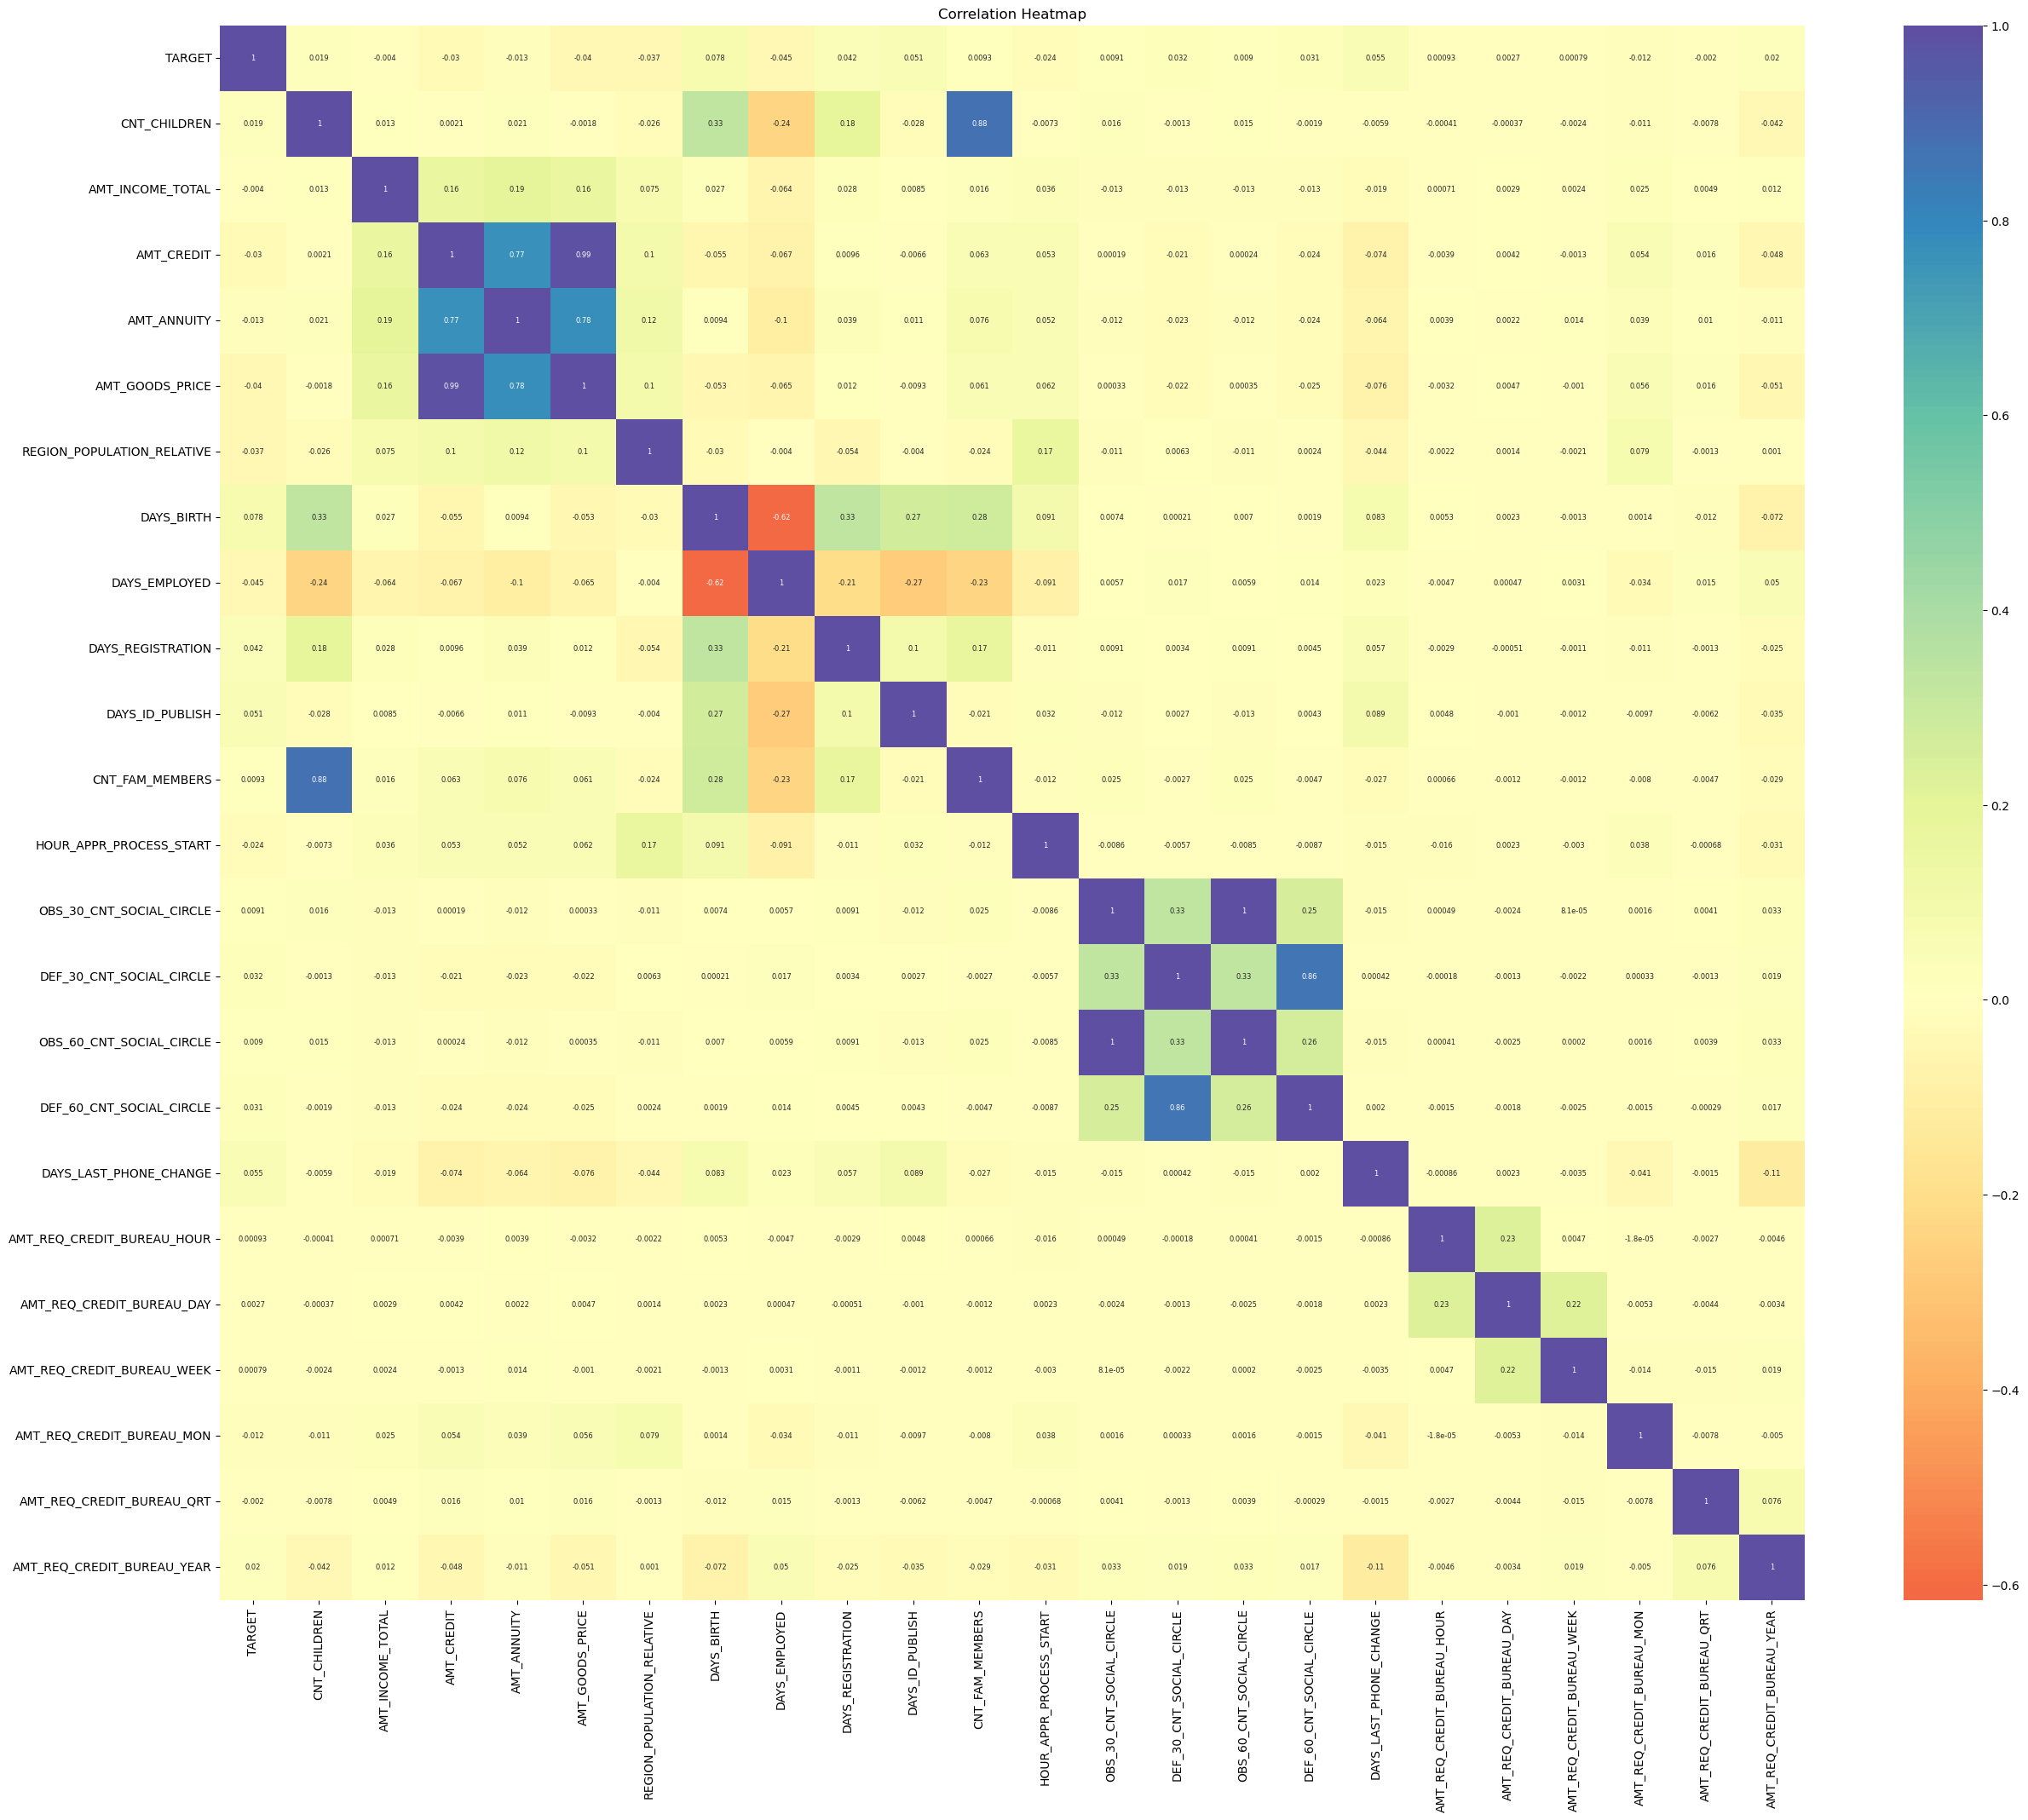

In [23]:
# checking the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = model_base.corr()

# create a heatmap
plt.figure(figsize=(30, 24))
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', center=0, annot_kws={'size': 6})
plt.title('Correlation Heatmap')
plt.show()

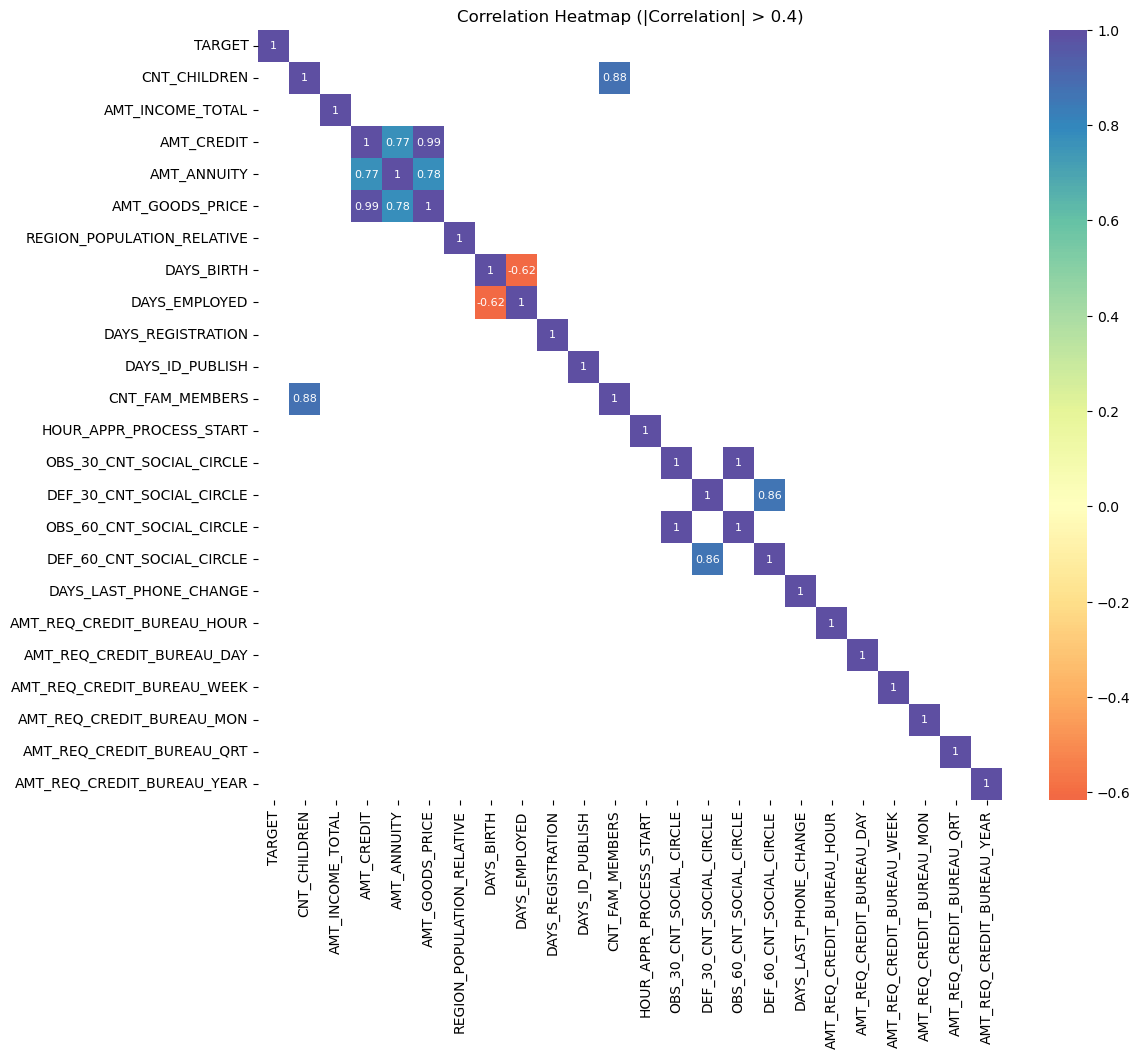

In [24]:
# Filter the correlation matrix based on the threshold > 0.4 or < -0.4
filtered_matrix = correlation_matrix[(correlation_matrix > 0.4) | (correlation_matrix < -0.4)]

# create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_matrix, annot=True, cmap='Spectral', center=0, annot_kws={'size': 8})
plt.title('Correlation Heatmap (|Correlation| > 0.4)')
plt.show()

In [25]:
# drop column that have high corelation with other column (correlation coefficient >0.4 or <-0.4), choose 1 column to stay
model_base = model_base.drop(columns=['CNT_CHILDREN','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','OBS_60_CNT_SOCIAL_CIRCLE',
                                      'DEF_60_CNT_SOCIAL_CIRCLE'])

C:\Users\wibow\AppData\Local\Temp\ipykernel_2676\3841390981.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = model_base.corr()


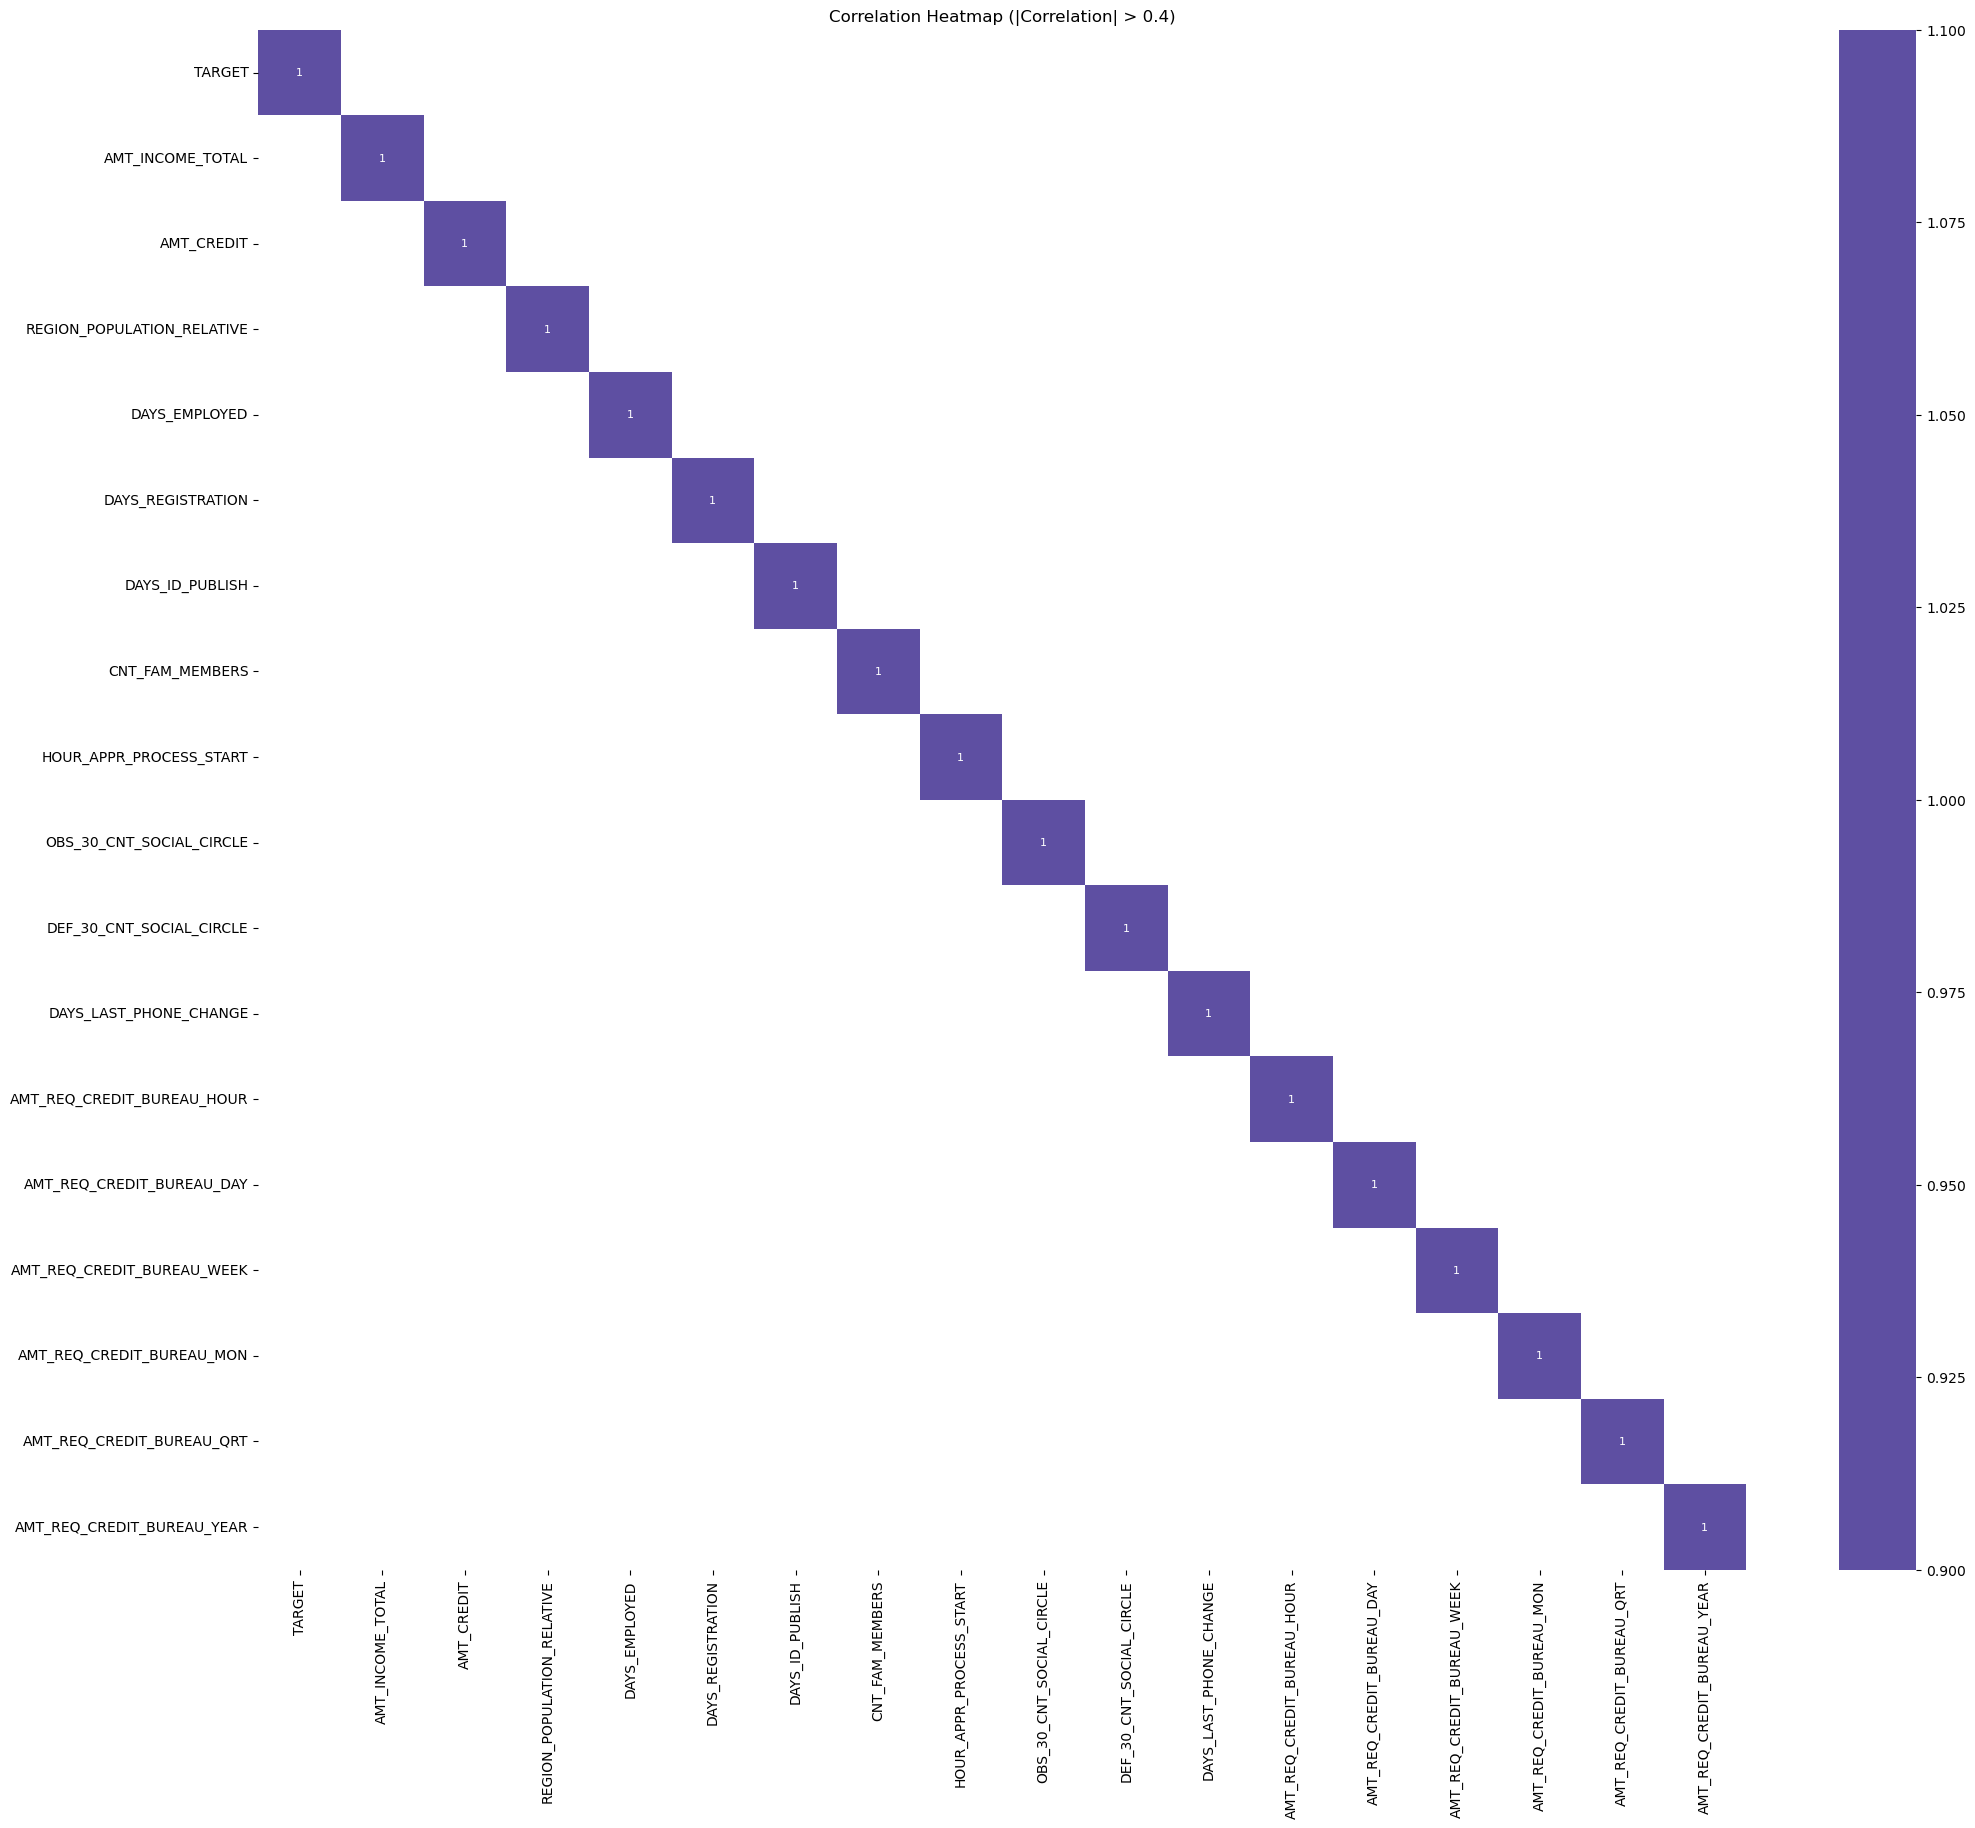

In [26]:
correlation_matrix = model_base.corr()

# Filter the correlation matrix based on the threshold
filtered_matrix = correlation_matrix[(correlation_matrix > 0.4) | (correlation_matrix < -0.4)]

# create a heatmap
plt.figure(figsize=(24 , 20))
sns.heatmap(filtered_matrix, annot=True, cmap='Spectral', center=0, annot_kws={'size': 8})
plt.title('Correlation Heatmap (|Correlation| > 0.4)')
plt.show()

In [27]:
inspect_data(model_base)

data shape: (307511, 60)


,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,M,N,Y,202500.0,406597.5,Working,Secondary / secondary special,Single / not married,0.018801,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,F,N,N,270000.0,1293502.5,State servant,Higher education,Married,0.003541,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,M,Y,Y,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,0.010032,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,F,N,Y,135000.0,312682.5,Working,Secondary / secondary special,Civil marriage,0.008019,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,M,N,Y,121500.0,513000.0,Working,Secondary / secondary special,Single / not married,0.028663,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
check_missing(model_base)

,missing_percentage,missing_frequency,types,count_value,unique_values
AMT_REQ_CREDIT_BUREAU_YEAR,13.501631,41519,float64,26,"[1.0, 0.0, nan, 2.0, 4.0, 5.0, 3.0, 8.0, 6.0, ..."
AMT_REQ_CREDIT_BUREAU_QRT,13.501631,41519,float64,12,"[0.0, nan, 1.0, 2.0, 4.0, 3.0, 8.0, 5.0, 6.0, ..."
AMT_REQ_CREDIT_BUREAU_MON,13.501631,41519,float64,25,"[0.0, nan, 1.0, 2.0, 6.0, 5.0, 3.0, 7.0, 9.0, ..."
AMT_REQ_CREDIT_BUREAU_WEEK,13.501631,41519,float64,10,"[0.0, nan, 1.0, 3.0, 2.0, 4.0, 5.0, 6.0, 8.0, ..."
AMT_REQ_CREDIT_BUREAU_DAY,13.501631,41519,float64,10,"[0.0, nan, 1.0, 3.0, 2.0, 4.0, 5.0, 6.0, 9.0, ..."
AMT_REQ_CREDIT_BUREAU_HOUR,13.501631,41519,float64,6,"[0.0, nan, 1.0, 2.0, 3.0, 4.0]"
OBS_30_CNT_SOCIAL_CIRCLE,0.332021,1021,float64,34,"[2.0, 1.0, 0.0, 4.0, 8.0, 10.0, nan, 7.0, 3.0,..."
DEF_30_CNT_SOCIAL_CIRCLE,0.332021,1021,float64,11,"[2.0, 0.0, 1.0, nan, 3.0, 4.0, 5.0, 6.0, 7.0, ..."
CNT_FAM_MEMBERS,0.000650,2,float64,18,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 9.0, 7.0, 8.0, ..."
DAYS_LAST_PHONE_CHANGE,0.000325,1,float64,3774,"[-1134.0, -828.0, -815.0, -617.0, -1106.0, -25..."


In [29]:
# drop categorical column with high cardinality and by expert judgement
model_base = model_base.drop(columns=['ORGANIZATION_TYPE'])

In [30]:
# convert the negative value to positive
model_base['DAYS_LAST_PHONE_CHANGE'] = model_base['DAYS_LAST_PHONE_CHANGE'].abs()
model_base['DAYS_EMPLOYED'] = model_base['DAYS_EMPLOYED'].abs()
model_base['DAYS_REGISTRATION'] = model_base['DAYS_REGISTRATION'].abs()
model_base['DAYS_ID_PUBLISH'] = model_base['DAYS_ID_PUBLISH'].abs()

In [31]:
check_missing(model_base)

,missing_percentage,missing_frequency,types,count_value,unique_values
AMT_REQ_CREDIT_BUREAU_YEAR,13.501631,41519,float64,26,"[1.0, 0.0, nan, 2.0, 4.0, 5.0, 3.0, 8.0, 6.0, ..."
AMT_REQ_CREDIT_BUREAU_QRT,13.501631,41519,float64,12,"[0.0, nan, 1.0, 2.0, 4.0, 3.0, 8.0, 5.0, 6.0, ..."
AMT_REQ_CREDIT_BUREAU_MON,13.501631,41519,float64,25,"[0.0, nan, 1.0, 2.0, 6.0, 5.0, 3.0, 7.0, 9.0, ..."
AMT_REQ_CREDIT_BUREAU_WEEK,13.501631,41519,float64,10,"[0.0, nan, 1.0, 3.0, 2.0, 4.0, 5.0, 6.0, 8.0, ..."
AMT_REQ_CREDIT_BUREAU_DAY,13.501631,41519,float64,10,"[0.0, nan, 1.0, 3.0, 2.0, 4.0, 5.0, 6.0, 9.0, ..."
AMT_REQ_CREDIT_BUREAU_HOUR,13.501631,41519,float64,6,"[0.0, nan, 1.0, 2.0, 3.0, 4.0]"
OBS_30_CNT_SOCIAL_CIRCLE,0.332021,1021,float64,34,"[2.0, 1.0, 0.0, 4.0, 8.0, 10.0, nan, 7.0, 3.0,..."
DEF_30_CNT_SOCIAL_CIRCLE,0.332021,1021,float64,11,"[2.0, 0.0, 1.0, nan, 3.0, 4.0, 5.0, 6.0, 7.0, ..."
CNT_FAM_MEMBERS,0.000650,2,float64,18,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 9.0, 7.0, 8.0, ..."
DAYS_LAST_PHONE_CHANGE,0.000325,1,float64,3774,"[1134.0, 828.0, 815.0, 617.0, 1106.0, 2536.0, ..."


In [32]:
inspect_data(model_base)

data shape: (307511, 59)


,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,M,N,Y,202500.0,406597.5,Working,Secondary / secondary special,Single / not married,0.018801,637,3648.0,2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,F,N,N,270000.0,1293502.5,State servant,Higher education,Married,0.003541,1188,1186.0,291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,M,Y,Y,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,0.010032,225,4260.0,2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,F,N,Y,135000.0,312682.5,Working,Secondary / secondary special,Civil marriage,0.008019,3039,9833.0,2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,M,N,Y,121500.0,513000.0,Working,Secondary / secondary special,Single / not married,0.028663,3038,4311.0,3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# handling missing value
'''
# defining columns with missing value
categorical_columns = []
numerical_columns = ['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK',
                     'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','OBS_30_CNT_SOCIAL_CIRCL','DEF_30_CNT_SOCIAL_CIRCLE',
                    'CNT_FAM_MEMBERS','DAYS_LAST_PHONE_CHANGE']

# impute categorical columns with mode because it helps to preserve the overall distribution of categorical data and is 
# suitable when the missing values are expected to occur at random.
for col in categorical_columns:
    mode_value = model_base[col].mode()[0]
    model_base[col].fillna(mode_value, inplace=True)

# impute numerical columns with median because it less sensitive to extreme values (outliers)
for col in numerical_columns:
    median_value = model_base[col].median()
    model_base[col].fillna(median_value, inplace=True)
'''
    
model_base = model_base.dropna(subset=['AMT_REQ_CREDIT_BUREAU_YEAR','DEF_30_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE',
                                       'CNT_FAM_MEMBERS'])

In [34]:
inspect_data(model_base)

data shape: (265140, 59)


,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,M,N,Y,202500.0,406597.5,Working,Secondary / secondary special,Single / not married,0.018801,637,3648.0,2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,F,N,N,270000.0,1293502.5,State servant,Higher education,Married,0.003541,1188,1186.0,291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,M,Y,Y,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,0.010032,225,4260.0,2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,M,N,Y,121500.0,513000.0,Working,Secondary / secondary special,Single / not married,0.028663,3038,4311.0,3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,M,N,Y,99000.0,490495.5,State servant,Secondary / secondary special,Married,0.035792,1588,4970.0,477,1,1,1,1,1,0,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,0.0,0.0,2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0


In [35]:
check_missing(model_base)

,missing_percentage,missing_frequency,types,count_value,unique_values
TARGET,0.0,0,int64,2,"[1, 0]"
FLAG_DOCUMENT_13,0.0,0,object,2,"[0, 1]"
DAYS_LAST_PHONE_CHANGE,0.0,0,float64,3747,"[1134.0, 828.0, 815.0, 1106.0, 2536.0, 1562.0,..."
FLAG_DOCUMENT_2,0.0,0,object,1,[0]
FLAG_DOCUMENT_3,0.0,0,object,2,"[1, 0]"
FLAG_DOCUMENT_4,0.0,0,object,2,"[0, 1]"
FLAG_DOCUMENT_5,0.0,0,object,2,"[0, 1]"
FLAG_DOCUMENT_6,0.0,0,object,2,"[0, 1]"
FLAG_DOCUMENT_7,0.0,0,object,2,"[0, 1]"
FLAG_DOCUMENT_8,0.0,0,object,2,"[0, 1]"


In [36]:
# drop column with only 1 unique value
single_value_cols = [col for col in model_base.columns if model_base[col].nunique() == 1]
model_base = model_base.drop(columns=single_value_cols)

In [37]:
# checking column with 1 dominant category, 80% will be the threshold
for col in model_base.select_dtypes(include='object').columns.tolist():
    value_counts_percentage = model_base[col].value_counts(normalize=True) * 100
    if any(value_counts_percentage > 80):
        print(value_counts_percentage)
        print('\n')

1    82.052123
0    17.947877
Name: FLAG_EMP_PHONE, dtype: float64


0    80.174625
1    19.825375
Name: FLAG_WORK_PHONE, dtype: float64


1    99.801237
0     0.198763
Name: FLAG_CONT_MOBILE, dtype: float64


0    94.218903
1     5.781097
Name: FLAG_EMAIL, dtype: float64


0    98.565286
1     1.434714
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64


0    95.04375
1     4.95625
Name: REG_REGION_NOT_WORK_REGION, dtype: float64


0    95.992683
1     4.007317
Name: LIVE_REGION_NOT_WORK_REGION, dtype: float64


0    92.493777
1     7.506223
Name: REG_CITY_NOT_LIVE_CITY, dtype: float64


0    82.262578
1    17.737422
Name: LIVE_CITY_NOT_WORK_CITY, dtype: float64


0    99.990948
1     0.009052
Name: FLAG_DOCUMENT_4, dtype: float64


0    98.486083
1     1.513917
Name: FLAG_DOCUMENT_5, dtype: float64


0    91.169571
1     8.830429
Name: FLAG_DOCUMENT_6, dtype: float64


0    99.982274
1     0.017726
Name: FLAG_DOCUMENT_7, dtype: float64


0    91.786603
1     8.213397
Name: FLAG_DOCUMEN

In [38]:
# drop column with 1 dominant category automaticaly, 80% will be the threshold
for col in model_base.select_dtypes(include='object').columns.tolist():
    value_counts_percentage = model_base[col].value_counts(normalize=True) * 100
    if any(value_counts_percentage > 80):
        model_base = model_base.drop(columns=col)

In [39]:
# checking column with 1 dominant category, 80% will be the threshold
for col in model_base.select_dtypes(include='object').columns.tolist():
    value_counts_percentage = model_base[col].value_counts(normalize=True) * 100
    if any(value_counts_percentage > 80):
        print(value_counts_percentage)
        print('\n')

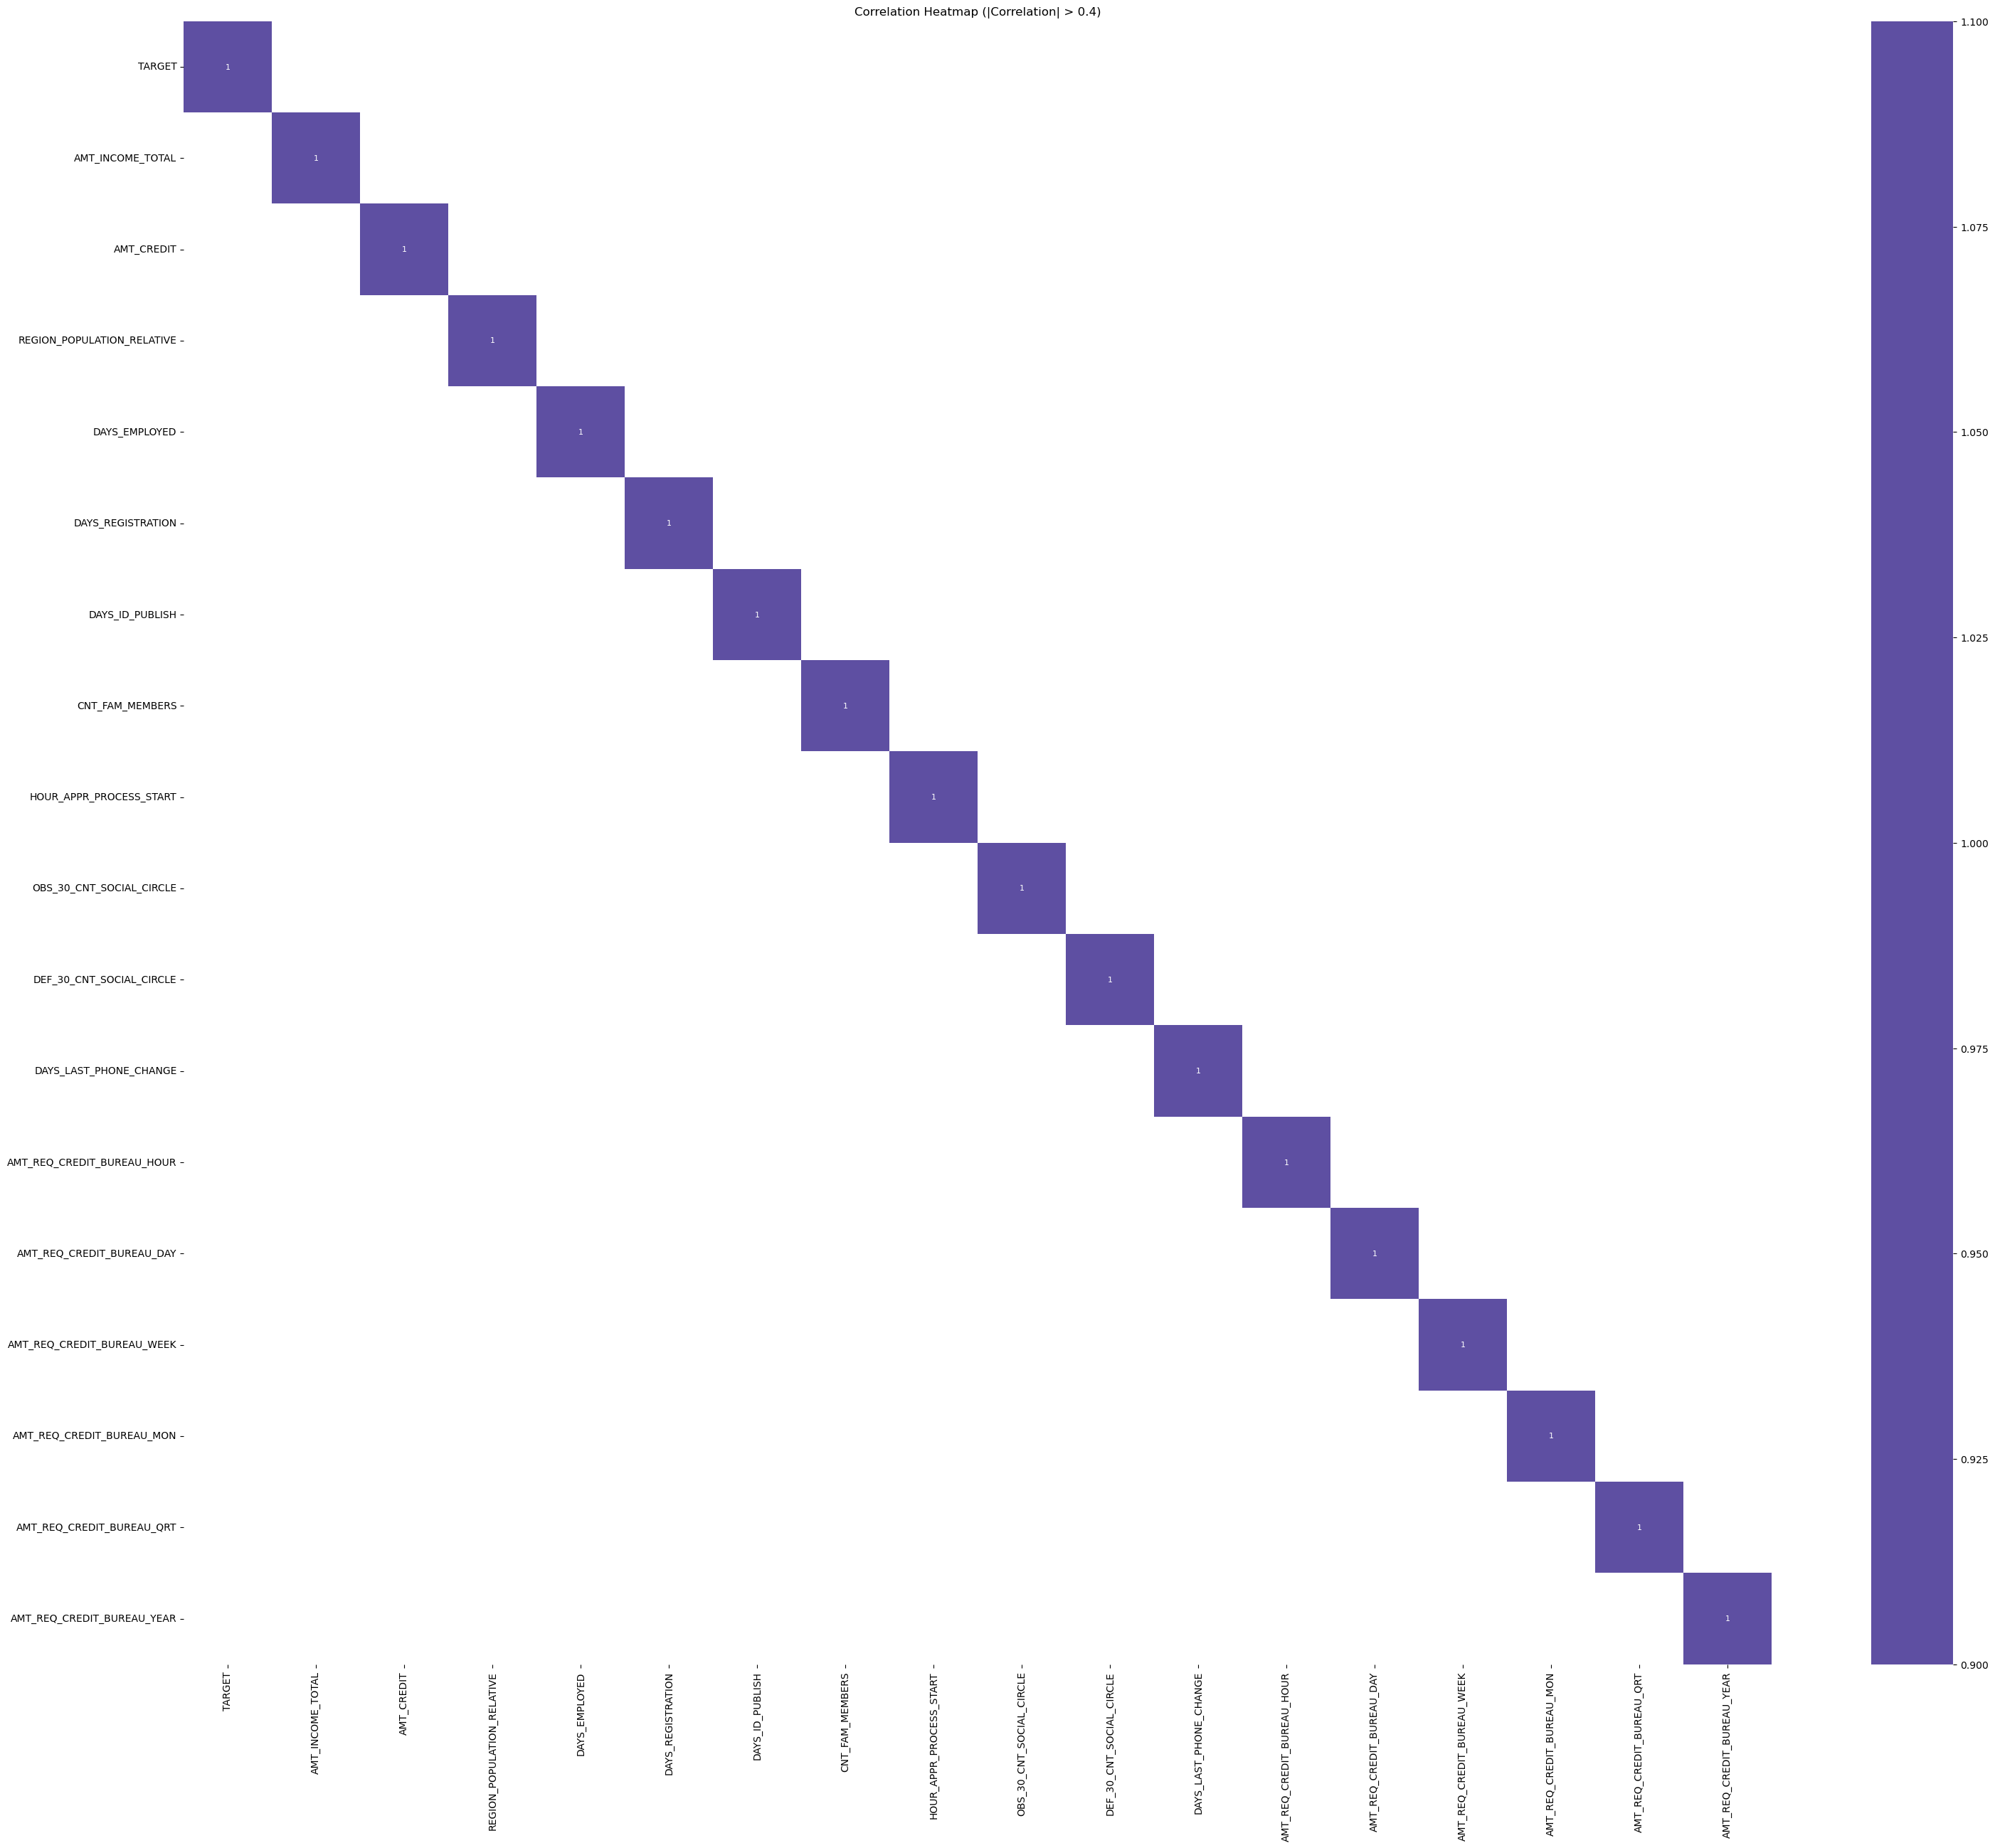

In [40]:
# Filter the correlation matrix based on the threshold > 0.4 or < -0.4
filtered_matrix = correlation_matrix[(correlation_matrix > 0.4) | (correlation_matrix < -0.4)]

# create a heatmap
plt.figure(figsize=(36, 30))
sns.heatmap(filtered_matrix, annot=True, cmap='Spectral', center=0, annot_kws={'size': 8})
plt.title('Correlation Heatmap (|Correlation| > 0.4)')
plt.show()

C:\Users\wibow\AppData\Local\Temp\ipykernel_2676\2822623808.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = model_base.corr()


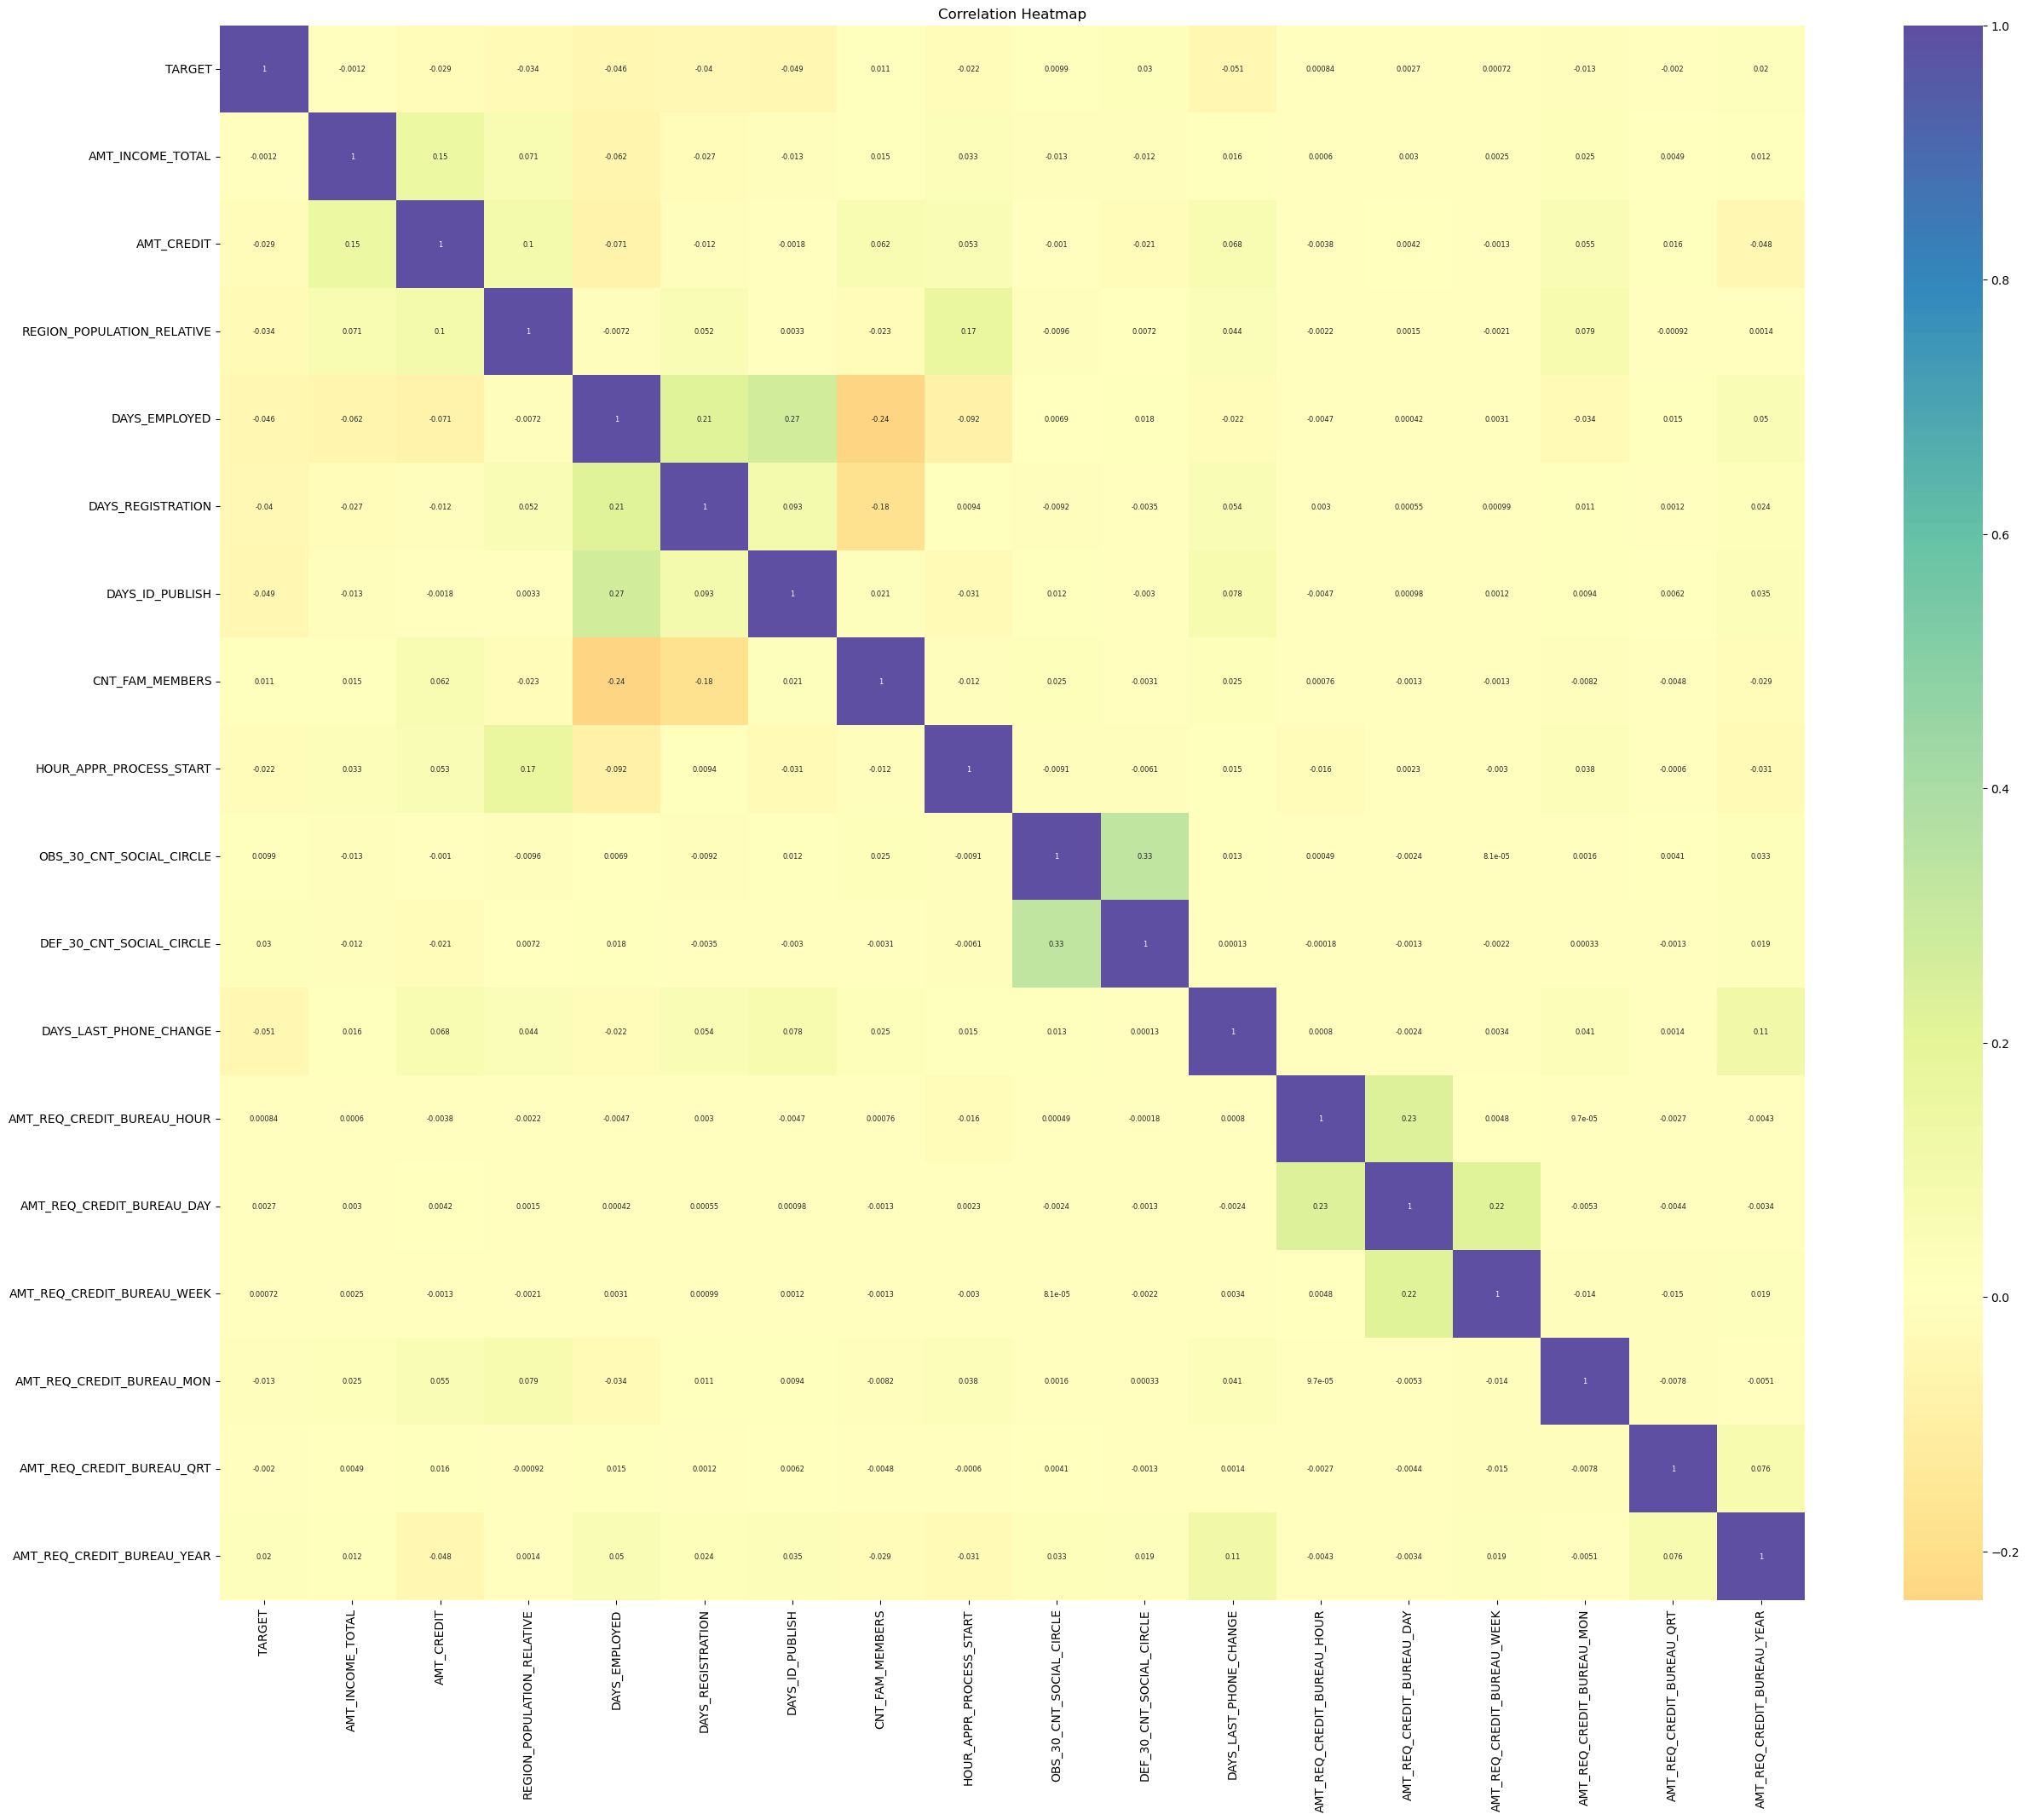

In [41]:
correlation_matrix = model_base.corr()

# create a heatmap
plt.figure(figsize=(30, 24))
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', center=0, annot_kws={'size': 6})
plt.title('Correlation Heatmap')
plt.show()

In [42]:
inspect_data(model_base)

data shape: (265140, 30)


,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_PHONE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,M,N,Y,202500.0,406597.5,Working,Secondary / secondary special,Single / not married,0.018801,637,3648.0,2120,1,1.0,2,2,WEDNESDAY,10,0,2.0,2.0,1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,0,F,N,N,270000.0,1293502.5,State servant,Higher education,Married,0.003541,1188,1186.0,291,1,2.0,1,1,MONDAY,11,0,1.0,0.0,828.0,1,0.0,0.0,0.0,0.0,0.0,0.0
2,0,M,Y,Y,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,0.010032,225,4260.0,2531,1,1.0,2,2,MONDAY,9,0,0.0,0.0,815.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,M,N,Y,121500.0,513000.0,Working,Secondary / secondary special,Single / not married,0.028663,3038,4311.0,3458,0,1.0,2,2,THURSDAY,11,1,0.0,0.0,1106.0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,M,N,Y,99000.0,490495.5,State servant,Secondary / secondary special,Married,0.035792,1588,4970.0,477,1,2.0,2,2,WEDNESDAY,16,0,0.0,0.0,2536.0,1,0.0,0.0,0.0,0.0,1.0,1.0


In [43]:
check_missing(model_base)

,missing_percentage,missing_frequency,types,count_value,unique_values
TARGET,0.0,0,int64,2,"[1, 0]"
CODE_GENDER,0.0,0,object,3,"[M, F, XNA]"
AMT_REQ_CREDIT_BUREAU_QRT,0.0,0,float64,11,"[0.0, 1.0, 2.0, 4.0, 3.0, 8.0, 5.0, 6.0, 7.0, ..."
AMT_REQ_CREDIT_BUREAU_MON,0.0,0,float64,24,"[0.0, 1.0, 2.0, 6.0, 5.0, 3.0, 7.0, 9.0, 4.0, ..."
AMT_REQ_CREDIT_BUREAU_WEEK,0.0,0,float64,9,"[0.0, 1.0, 3.0, 2.0, 4.0, 5.0, 6.0, 8.0, 7.0]"
AMT_REQ_CREDIT_BUREAU_DAY,0.0,0,float64,9,"[0.0, 1.0, 3.0, 2.0, 4.0, 5.0, 6.0, 9.0, 8.0]"
AMT_REQ_CREDIT_BUREAU_HOUR,0.0,0,float64,5,"[0.0, 1.0, 2.0, 3.0, 4.0]"
FLAG_DOCUMENT_3,0.0,0,object,2,"[1, 0]"
DAYS_LAST_PHONE_CHANGE,0.0,0,float64,3747,"[1134.0, 828.0, 815.0, 1106.0, 2536.0, 1562.0,..."
DEF_30_CNT_SOCIAL_CIRCLE,0.0,0,float64,10,"[2.0, 0.0, 1.0, 3.0, 5.0, 4.0, 6.0, 7.0, 34.0,..."


# Scaling and encoding

In [44]:
# define categorical columns
categorical_cols = [col for col in model_base.select_dtypes(include='object').columns.tolist()]

# develop onehot encoding dataframe
onehot = pd.get_dummies(model_base[categorical_cols], drop_first=True)

C:\Users\wibow\AppData\Local\Temp\ipykernel_2676\1689245106.py:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  onehot = pd.get_dummies(model_base[categorical_cols], drop_first=True)
C:\Users\wibow\AppData\Local\Temp\ipykernel_2676\1689245106.py:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  onehot = pd.get_dummies(model_base[categorical_cols], drop_first=True)
C:\Users\wibow\AppData\Local\Temp\ipykernel_2676\1689245106.py:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  onehot = pd.get_dummies(model_base[categorical_cols], drop_first=True)
C:\Users\wibow\AppData\Local\Temp\ipykernel_2676\1689245106.py:5: FutureWarning: In a future version, the Index constructor will not 

In [45]:
onehot.head()

,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,FLAG_PHONE_1,REGION_RATING_CLIENT_2,REGION_RATING_CLIENT_3,REGION_RATING_CLIENT_W_CITY_2,REGION_RATING_CLIENT_W_CITY_3,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,REG_CITY_NOT_WORK_CITY_1,FLAG_DOCUMENT_3_1
0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,1
1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
2,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0
5,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,1


In [46]:
onehot.shape

(265140, 32)

In [47]:
# import library
from sklearn.preprocessing import StandardScaler

model_num = model_base.drop(columns=['TARGET'])

# define numerical columns
numerical_cols = [col for col in model_num.columns.tolist() if col not in categorical_cols]

# develop standardscaler dataframe
ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(model_num[numerical_cols]), columns=numerical_cols)

In [48]:
std.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0.126156,-0.494609,-0.146968,-0.480601,-0.380270,-0.623144,-1.277571,-0.640299,0.234809,4.160927,0.176925,-0.076257,-0.063281,-0.168018,-0.292093,-0.334340,-0.482084
1,0.397710,1.695673,-1.258590,-0.476644,-1.079048,-1.850328,-0.179881,-0.332931,-0.178566,-0.321153,-0.190384,-0.076257,-0.063281,-0.168018,-0.292093,-0.334340,-1.017111
2,-0.416951,-1.165341,-0.785750,-0.483561,-0.206569,-0.347380,-1.277571,-0.947666,-0.591941,-0.321153,-0.205988,-0.076257,-0.063281,-0.168018,-0.292093,-0.334340,-1.017111
3,-0.199708,-0.231840,0.571433,-0.463356,-0.192094,0.274599,-1.277571,-0.332931,-0.591941,-0.321153,0.143315,-0.076257,-0.063281,-0.168018,-0.292093,-0.334340,-1.017111
4,-0.290226,-0.287417,1.090749,-0.473771,-0.005054,-1.725530,-0.179881,1.203905,-0.591941,-0.321153,1.859826,-0.076257,-0.063281,-0.168018,-0.292093,0.924259,-0.482084


In [49]:
std.shape

(265140, 17)

In [50]:
# resetting the index of each dataframe to make sure the row numbers doesn't add up
df_reset = model_base.reset_index(drop=True)
onehot_reset = onehot.reset_index(drop=True)
std_reset = std.reset_index(drop=True)

# develop dataframe for machine learning modeling
df_model = pd.concat([onehot_reset, std_reset, df_reset[['TARGET']]], axis=1)

In [51]:
# check the model dataframe
df_model.head()

,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,FLAG_PHONE_1,REGION_RATING_CLIENT_2,REGION_RATING_CLIENT_3,REGION_RATING_CLIENT_W_CITY_2,REGION_RATING_CLIENT_W_CITY_3,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,REG_CITY_NOT_WORK_CITY_1,FLAG_DOCUMENT_3_1,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,1,0.126156,-0.494609,-0.146968,-0.480601,-0.380270,-0.623144,-1.277571,-0.640299,0.234809,4.160927,0.176925,-0.076257,-0.063281,-0.168018,-0.292093,-0.334340,-0.482084,1
1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0.397710,1.695673,-1.258590,-0.476644,-1.079048,-1.850328,-0.179881,-0.332931,-0.178566,-0.321153,-0.190384,-0.076257,-0.063281,-0.168018,-0.292093,-0.334340,-1.017111,0
2,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,-0.416951,-1.165341,-0.785750,-0.483561,-0.206569,-0.347380,-1.277571,-0.947666,-0.591941,-0.321153,-0.205988,-0.076257,-0.063281,-0.168018,-0.292093,-0.334340,-1.017111,0
3,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,-0.199708,-0.231840,0.571433,-0.463356,-0.192094,0.274599,-1.277571,-0.332931,-0.591941,-0.321153,0.143315,-0.076257,-0.063281,-0.168018,-0.292093,-0.334340,-1.017111,0
4,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,1,-0.290226,-0.287417,1.090749,-0.473771,-0.005054,-1.725530,-0.179881,1.203905,-0.591941,-0.321153,1.859826,-0.076257,-0.063281,-0.168018,-0.292093,0.924259,-0.482084,0


In [52]:
df_model.shape

(265140, 50)

# Train test split

In [53]:
# define features (X) and target variable (Y)
X = df_model
Y = df_model['TARGET']

# get the column names as feature names
feature_names = X.columns.tolist()

In [54]:
# import library
from sklearn.model_selection import train_test_split

# split the data into training and testing sets (80% training, 20% testing for n between 100,000 to 1,000,000)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [55]:
# check dataframe shape
X_train.shape, X_test.shape

((212112, 50), (53028, 50))

# Oversampling with SMOTE

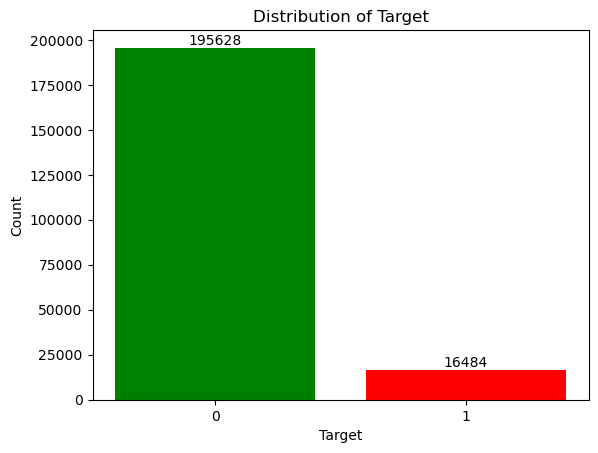

In [56]:
# count the occurrences of each loan category
loan_category_counts = X_train['TARGET'].value_counts()

# set colors for different loan categories
colors = ['green', 'red']

# plot the distribution of loan label
plt.bar(loan_category_counts.index, loan_category_counts.values, color=colors)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Target')

# set x-axis ticks to only show 0 and 1
plt.xticks([0, 1])

# add values on top of the bars
for i, count in enumerate(loan_category_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

plt.show()

In [57]:
# import library
from imblearn.over_sampling import SMOTE

# conducting oversampling using SMOTE
smote = SMOTE(random_state=42)
X_train, Y_train = smote.fit_resample(X, Y)

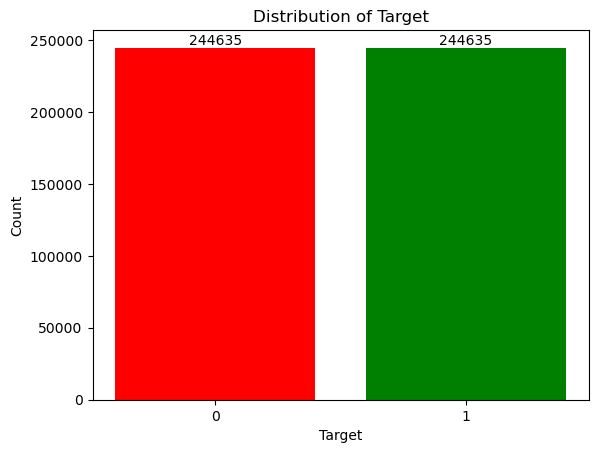

In [58]:
# count the occurrences of each loan category
loan_category_counts = X_train['TARGET'].value_counts()

# set colors for different loan categories
colors = ['green', 'red']

# plot the distribution of loan label
plt.bar(loan_category_counts.index, loan_category_counts.values, color=colors)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Target')

# set x-axis ticks to only show 0 and 1
plt.xticks([0, 1])

# add values on top of the bars
for i, count in enumerate(loan_category_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

plt.show()

# Train, test, evaluate, and hyperparameter tuning

In [59]:
# droping target column
X_train = X_train.drop('TARGET', axis=1)
X_test = X_test.drop('TARGET', axis=1)

In [60]:
# check dataframe shape
X_train.shape, X_test.shape

((489270, 49), (53028, 49))

In [61]:
# import library
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

# initialize different models
results = {}
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
}

# initialize dictionary to store classification reports
classification_reports = {}
model_names = []
accuracies = []

# train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, Y_train)

    print(f"Evaluating {model_name}...")
    Y_pred = model.predict(X_test)

    confusion = confusion_matrix(Y_test, Y_pred)
    classification_rep = classification_report(
        Y_test, Y_pred, target_names=['1', '0'], zero_division=1  # handle zero division
    )

    # store the classification report in the dictionary
    classification_reports[model_name] = classification_rep

    accuracy = accuracy_score(Y_test, Y_pred)

    model_names.append(model_name)
    accuracies.append(accuracy)

    print("\nClassification Report:")
    print(classification_rep)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print("=" * 50)

Training Random Forest...
Evaluating Random Forest...

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     49007
           0       1.00      1.00      1.00      4021

    accuracy                           1.00     53028
   macro avg       1.00      1.00      1.00     53028
weighted avg       1.00      1.00      1.00     53028

Random Forest Accuracy: 1.0000
Training Logistic Regression...


C:\Users\wibow\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluating Logistic Regression...

Classification Report:
              precision    recall  f1-score   support

           1       0.93      0.82      0.87     49007
           0       0.11      0.27      0.15      4021

    accuracy                           0.78     53028
   macro avg       0.52      0.54      0.51     53028
weighted avg       0.87      0.78      0.82     53028

Logistic Regression Accuracy: 0.7752
Training Decision Tree...
Evaluating Decision Tree...

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     49007
           0       1.00      1.00      1.00      4021

    accuracy                           1.00     53028
   macro avg       1.00      1.00      1.00     53028
weighted avg       1.00      1.00      1.00     53028

Decision Tree Accuracy: 1.0000
Training Gradient Boosting...
Evaluating Gradient Boosting...

Classification Report:
              precision    recall  f1-score   support

 

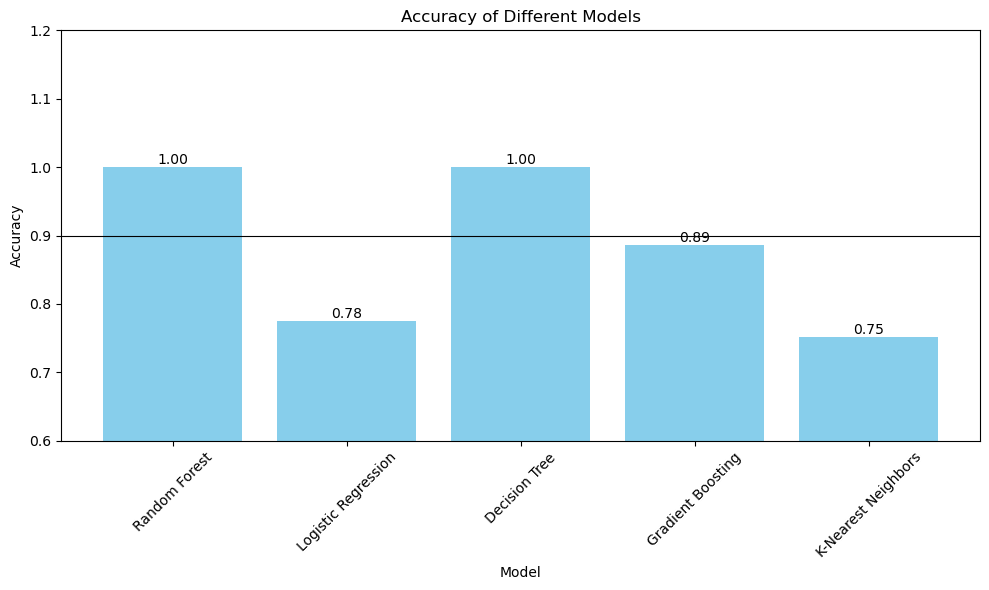

In [62]:
# create a bar plot to visualize accuracies
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color='skyblue')

# add annotations in the middle of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

# set labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')

# set y-axis limits to 0-1 for accuracy percentage
plt.ylim(0.6, 1.2)

# rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.tight_layout()

# add horizontal axis line at y=0.9
plt.axhline(0.9, color='black', linewidth=0.8)

plt.show()

In [63]:
# initialize model
import numpy as np

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, Y_train)

y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(Y_test), columns=['y_actual']), 
                                 pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = Y_test.index

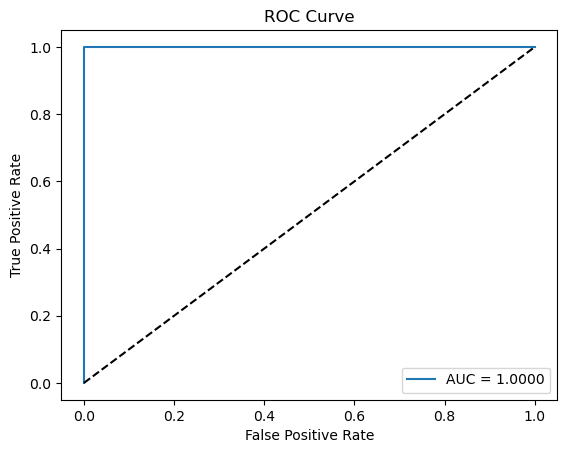

In [64]:
# import library
from sklearn.metrics import roc_curve, roc_auc_score

# initialize auc
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [65]:
# define variables for ks
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

Text(0.5, 1.0, 'Kolmogorov-Smirnov:  1.0000')

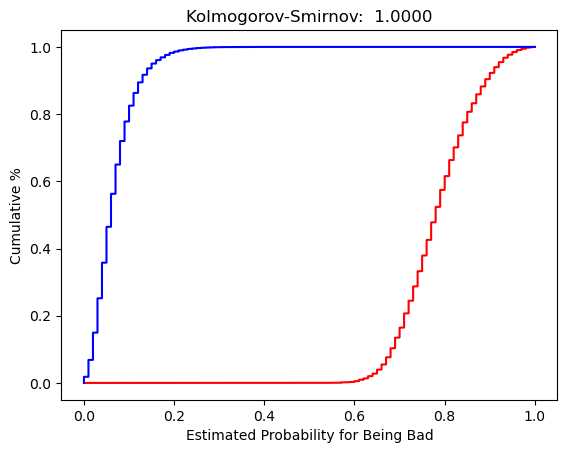

In [66]:
# innitialize ks
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

In [67]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier()

# specify the number of folds (K)
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# perform K-Fold Cross-Validation on train set
scores = cross_val_score(model, X_train, Y_train, cv=k_fold, scoring='accuracy')

# print the accuracy scores for each fold
for i, score in enumerate(scores, 1):
    print(f'Fold {i}: Accuracy = {score:.4f}')

# print the mean and standard deviation of the accuracy scores
print(f'Mean Accuracy: {np.mean(scores):.4f}')
print(f'Standard Deviation: {np.std(scores):.4f}')

Fold 1: Accuracy = 0.9523
Fold 2: Accuracy = 0.9526
Fold 3: Accuracy = 0.9533
Fold 4: Accuracy = 0.9541
Fold 5: Accuracy = 0.9539
Mean Accuracy: 0.9532
Standard Deviation: 0.0007


In [68]:
# generating feature importances
arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features

,feature,importance
48,AMT_REQ_CREDIT_BUREAU_YEAR,9.984063e-02
32,AMT_INCOME_TOTAL,6.997780e-02
33,AMT_CREDIT,6.084842e-02
35,DAYS_EMPLOYED,5.986118e-02
42,DAYS_LAST_PHONE_CHANGE,5.952997e-02
34,REGION_POPULATION_RELATIVE,5.867703e-02
39,HOUR_APPR_PROCESS_START,5.271235e-02
40,OBS_30_CNT_SOCIAL_CIRCLE,5.186092e-02
37,DAYS_ID_PUBLISH,5.068278e-02
36,DAYS_REGISTRATION,4.958000e-02


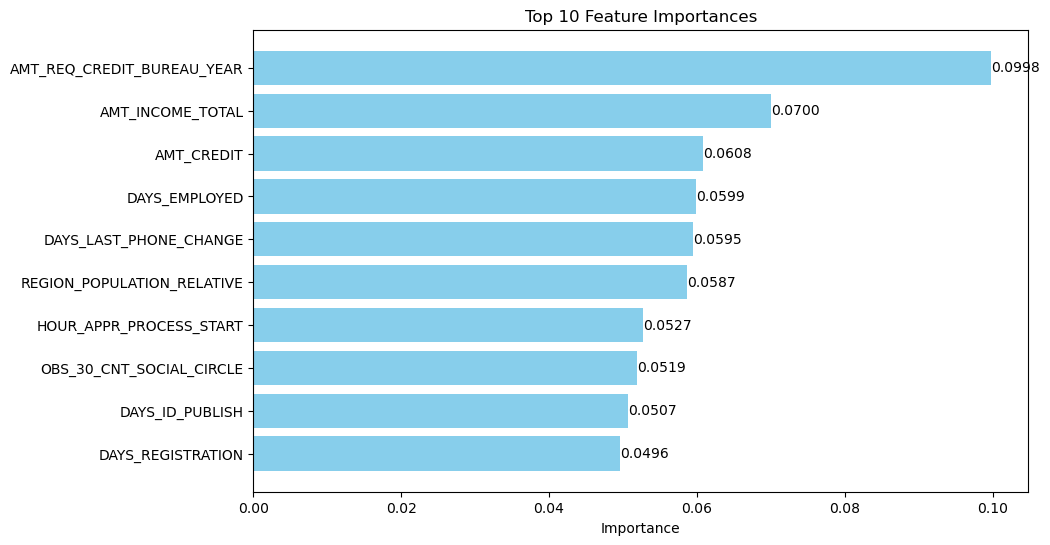

In [69]:
# showing top 10 feature importance on bar chart
df_top_features = df_all_features.head(10).sort_values(by='importance', ascending=True)

# plotting the bar chart
plt.figure(figsize=(10, 6))
plt.barh(df_top_features['feature'], df_top_features['importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances')

# annotating the bars with the importance values
for index, value in enumerate(df_top_features['importance']):
    plt.text(value, index, f'{value:.4f}', va='center')

plt.show()

In [70]:
# uncommet block code below for hyperparameter tuning random forest
'''
# Hyperparameter tuning on RandomForest
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid,
                                   n_iter=10, scoring='accuracy', cv=5, random_state=42)
random_search.fit(X_train, Y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate the model on the test set
test_accuracy = random_search.best_estimator_.score(X_test, Y_test)
print("Test Accuracy:", test_accuracy)
'''

'\n# Hyperparameter tuning on RandomForest\nfrom sklearn.model_selection import RandomizedSearchCV\n\n# Define the parameter grid\nparam_grid = {\n    \'n_estimators\': [50, 100, 200],\n    \'max_depth\': [None, 10, 20, 30],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4],\n    \'max_features\': [\'auto\', \'sqrt\', \'log2\', None]\n}\n\n# Set up RandomizedSearchCV\nrandom_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid,\n                                   n_iter=10, scoring=\'accuracy\', cv=5, random_state=42)\nrandom_search.fit(X_train, Y_train)\n\n# Print the best hyperparameters\nprint("Best Hyperparameters:", random_search.best_params_)\n\n# Evaluate the model on the test set\ntest_accuracy = random_search.best_estimator_.score(X_test, Y_test)\nprint("Test Accuracy:", test_accuracy)\n'

In [71]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, Y_train)

y_pred_proba = lr.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(Y_test), columns=['y_actual']), 
                                 pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = Y_test.index

C:\Users\wibow\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


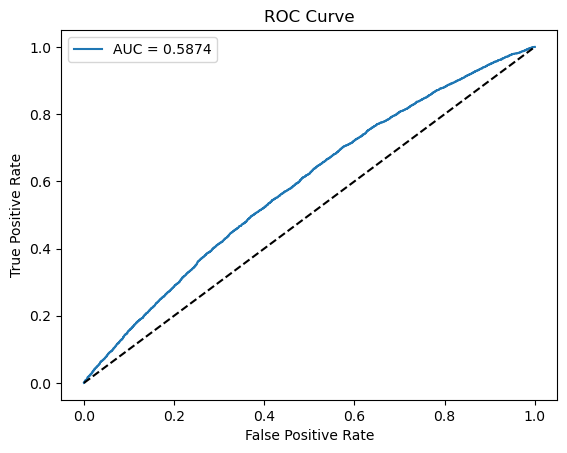

In [72]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [73]:
# define variables for ks
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.1280')

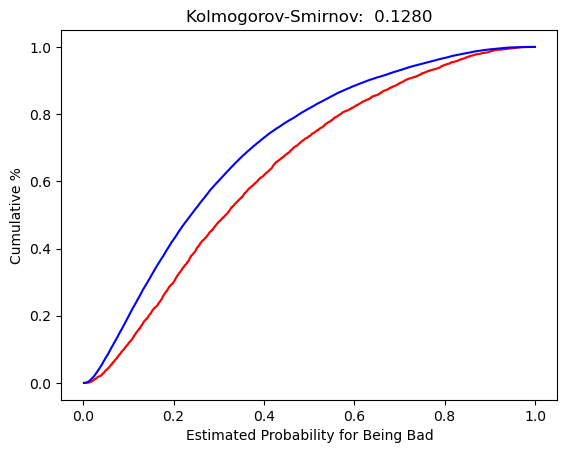

In [74]:
# innitialize ks
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

In [75]:
model = LogisticRegression()

# specify the number of folds (K)
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# perform K-Fold Cross-Validation on train set
scores = cross_val_score(model, X_train, Y_train, cv=k_fold, scoring='accuracy')

# print the accuracy scores for each fold
for i, score in enumerate(scores, 1):
    print(f'Fold {i}: Accuracy = {score:.4f}')

# print the mean and standard deviation of the accuracy scores
print(f'Mean Accuracy: {np.mean(scores):.4f}')
print(f'Standard Deviation: {np.std(scores):.4f}')

C:\Users\wibow\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\wibow\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fold 1: Accuracy = 0.7865
Fold 2: Accuracy = 0.7839
Fold 3: Accuracy = 0.7850
Fold 4: Accuracy = 0.7870
Fold 5: Accuracy = 0.7863
Mean Accuracy: 0.7857
Standard Deviation: 0.0011


C:\Users\wibow\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [76]:
# uncommet block code below for hyperparameter tuning logistic regresion
'''
# Hyperparameter tuning on logistic regresion
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, Y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model on the test set
y_pred = grid_search.best_estimator_.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_pred)
print("Test Accuracy:", test_accuracy)
'''

'\n# Hyperparameter tuning on logistic regresion\nfrom sklearn.model_selection import GridSearchCV\n\nparam_grid = {\n    \'C\': [0.001, 0.01, 0.1, 1, 10, 100],\n    \'penalty\': [\'l1\', \'l2\'],\n    \'solver\': [\'liblinear\', \'saga\']\n}\n\n# Set up GridSearchCV\ngrid_search = GridSearchCV(estimator=lr, param_grid=param_grid, scoring=\'accuracy\', cv=5)\ngrid_search.fit(X_train, Y_train)\n\n# Print the best hyperparameters\nprint("Best Hyperparameters:", grid_search.best_params_)\n\n# Evaluate the model on the test set\ny_pred = grid_search.best_estimator_.predict(X_test)\ntest_accuracy = accuracy_score(Y_test, Y_pred)\nprint("Test Accuracy:", test_accuracy)\n'

In [77]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, Y_train)

y_pred_proba = dtc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(Y_test), columns=['y_actual']), 
                                 pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = Y_test.index

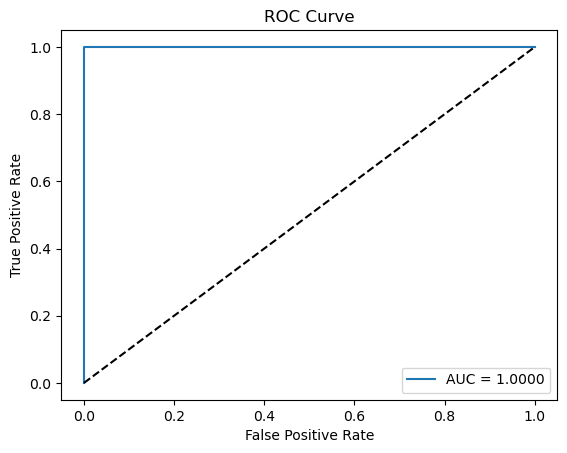

In [78]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [79]:
# define variables for ks
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

Text(0.5, 1.0, 'Kolmogorov-Smirnov:  1.0000')

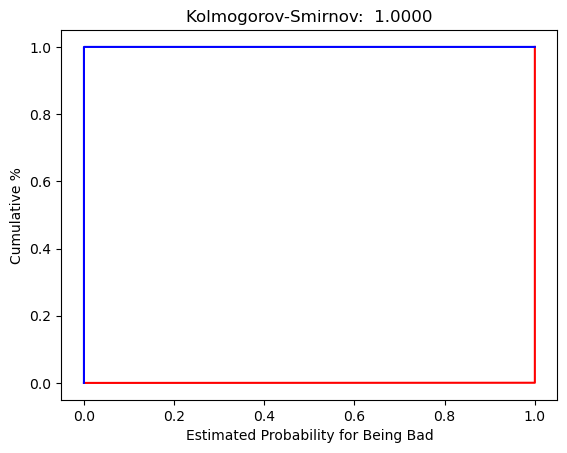

In [80]:
# innitialize ks
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

In [81]:
model = DecisionTreeClassifier()

# specify the number of folds (K)
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# perform K-Fold Cross-Validation on train set
scores = cross_val_score(model, X_train, Y_train, cv=k_fold, scoring='accuracy')

# print the accuracy scores for each fold
for i, score in enumerate(scores, 1):
    print(f'Fold {i}: Accuracy = {score:.4f}')

# print the mean and standard deviation of the accuracy scores
print(f'Mean Accuracy: {np.mean(scores):.4f}')
print(f'Standard Deviation: {np.std(scores):.4f}')

Fold 1: Accuracy = 0.8784
Fold 2: Accuracy = 0.8819
Fold 3: Accuracy = 0.8805
Fold 4: Accuracy = 0.8776
Fold 5: Accuracy = 0.8806
Mean Accuracy: 0.8798
Standard Deviation: 0.0016


In [82]:
# uncommet block code below for hyperparameter tuning decision tree
'''
# Hyperparameter tuning on Decision Tree
# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Create the Decision Tree model
dtc = DecisionTreeClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, Y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model on the test set
y_pred = grid_search.best_estimator_.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_pred)
print("Test Accuracy:", test_accuracy)
'''

'\n# Hyperparameter tuning on Decision Tree\n# Define the parameter grid\nparam_grid = {\n    \'max_depth\': [None, 5, 10, 15],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4],\n    \'criterion\': [\'gini\', \'entropy\']\n}\n\n# Create the Decision Tree model\ndtc = DecisionTreeClassifier(random_state=42)\n\n# Set up GridSearchCV\ngrid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, scoring=\'accuracy\', cv=5)\ngrid_search.fit(X_train, Y_train)\n\n# Print the best hyperparameters\nprint("Best Hyperparameters:", grid_search.best_params_)\n\n# Evaluate the model on the test set\ny_pred = grid_search.best_estimator_.predict(X_test)\ntest_accuracy = accuracy_score(Y_test, Y_pred)\nprint("Test Accuracy:", test_accuracy)\n'

In [83]:
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, Y_train)

y_pred_proba = gbc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(Y_test), columns=['y_actual']), 
                                 pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = Y_test.index

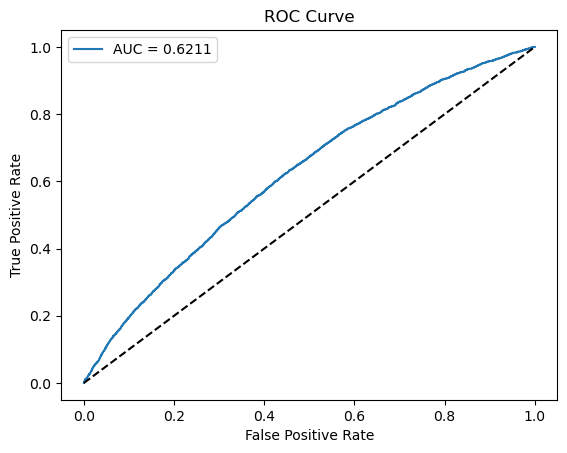

In [84]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [85]:
# define variables for ks
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.1774')

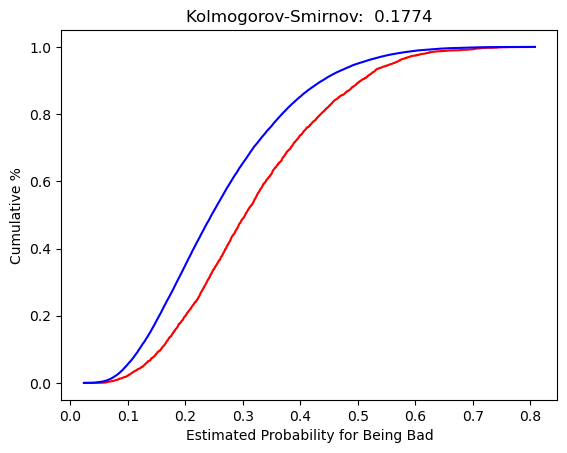

In [86]:
# innitialize ks
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

In [87]:
model = GradientBoostingClassifier()

# specify the number of folds (K)
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# perform K-Fold Cross-Validation on train set
scores = cross_val_score(model, X_train, Y_train, cv=k_fold, scoring='accuracy')

# print the accuracy scores for each fold
for i, score in enumerate(scores, 1):
    print(f'Fold {i}: Accuracy = {score:.4f}')

# print the mean and standard deviation of the accuracy scores
print(f'Mean Accuracy: {np.mean(scores):.4f}')
print(f'Standard Deviation: {np.std(scores):.4f}')

Fold 1: Accuracy = 0.9015
Fold 2: Accuracy = 0.9013
Fold 3: Accuracy = 0.9010
Fold 4: Accuracy = 0.9019
Fold 5: Accuracy = 0.8997
Mean Accuracy: 0.9011
Standard Deviation: 0.0007


In [88]:
# uncommet block code below for hyperparameter tuning gradient boosting
'''
# Hyperparameter tuning on Gradient Boosting
# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, Y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model on the test set
test_accuracy = grid_search.best_estimator_.score(X_test, Y_test)
print("Test Accuracy:", test_accuracy)
'''

'\n# Hyperparameter tuning on Gradient Boosting\n# Define the parameter grid\nparam_grid = {\n    \'learning_rate\': [0.01, 0.1, 0.2],\n    \'n_estimators\': [50, 100, 200],\n    \'max_depth\': [3, 4, 5]\n}\n\n# Set up GridSearchCV\ngrid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, scoring=\'accuracy\', cv=5)\ngrid_search.fit(X_train, Y_train)\n\n# Print the best hyperparameters\nprint("Best Hyperparameters:", grid_search.best_params_)\n\n# Evaluate the model on the test set\ntest_accuracy = grid_search.best_estimator_.score(X_test, Y_test)\nprint("Test Accuracy:", test_accuracy)\n'

In [89]:
knc = KNeighborsClassifier()
knc.fit(X_train, Y_train)

y_pred_proba = knc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(Y_test), columns=['y_actual']), 
                                 pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = Y_test.index

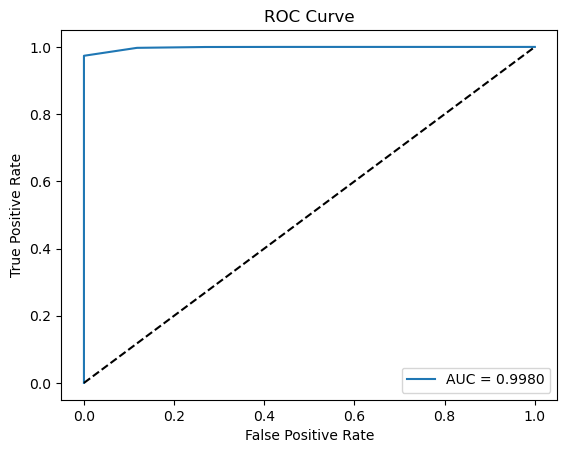

In [90]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [91]:
# define variables for ks
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.9736')

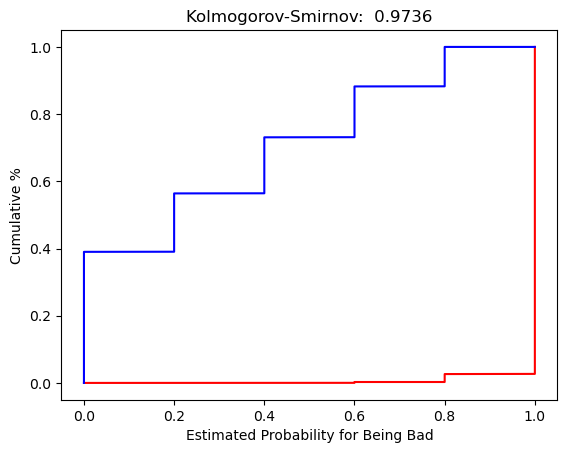

In [92]:
# innitialize ks
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

In [93]:
model = KNeighborsClassifier()

# specify the number of folds (K)
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# perform K-Fold Cross-Validation on train set
scores = cross_val_score(model, X_train, Y_train, cv=k_fold, scoring='accuracy')

# print the accuracy scores for each fold
for i, score in enumerate(scores, 1):
    print(f'Fold {i}: Accuracy = {score:.4f}')

# print the mean and standard deviation of the accuracy scores
print(f'Mean Accuracy: {np.mean(scores):.4f}')
print(f'Standard Deviation: {np.std(scores):.4f}')

Fold 1: Accuracy = 0.8004
Fold 2: Accuracy = 0.7991
Fold 3: Accuracy = 0.8035
Fold 4: Accuracy = 0.8038
Fold 5: Accuracy = 0.8010
Mean Accuracy: 0.8015
Standard Deviation: 0.0018


In [94]:
# uncommet block code below for hyperparameter tuning k nearest
'''
# Hyperparameter tuning on k-Nearest Neighbors
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance (L1), 2 for Euclidean distance (L2)
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=knc, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, Y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model on the test set
y_pred = grid_search.best_estimator_.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_pred)
print("Test Accuracy:", test_accuracy)
'''

'\n# Hyperparameter tuning on k-Nearest Neighbors\n# Define the parameter grid\nparam_grid = {\n    \'n_neighbors\': [3, 5, 7, 9],\n    \'weights\': [\'uniform\', \'distance\'],\n    \'p\': [1, 2]  # 1 for Manhattan distance (L1), 2 for Euclidean distance (L2)\n}\n\n# Set up GridSearchCV\ngrid_search = GridSearchCV(estimator=knc, param_grid=param_grid, scoring=\'accuracy\', cv=5)\ngrid_search.fit(X_train, Y_train)\n\n# Print the best hyperparameters\nprint("Best Hyperparameters:", grid_search.best_params_)\n\n# Evaluate the model on the test set\ny_pred = grid_search.best_estimator_.predict(X_test)\ntest_accuracy = accuracy_score(Y_test, Y_pred)\nprint("Test Accuracy:", test_accuracy)\n'

# Prediction with RandomForest Classification Model

In [95]:
# load the test data
app_test = pd.read_csv('application_test.csv')

In [96]:
# Find common columns
common_columns = set(app_test.columns).intersection(model_base.columns)

# Create a new DataFrame with common columns
data_test = pd.DataFrame({col: pd.concat([app_test[col], model_base[col]], ignore_index=True) for col in common_columns})

In [97]:
inspect_data(data_test)

data shape: (313884, 29)


,AMT_CREDIT,DAYS_LAST_PHONE_CHANGE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_QRT,REGION_RATING_CLIENT_W_CITY,AMT_REQ_CREDIT_BUREAU_WEEK,NAME_EDUCATION_TYPE,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,REG_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,FLAG_OWN_CAR,REGION_POPULATION_RELATIVE,FLAG_PHONE,AMT_REQ_CREDIT_BUREAU_HOUR,DAYS_ID_PUBLISH,DEF_30_CNT_SOCIAL_CIRCLE,WEEKDAY_APPR_PROCESS_START,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_MON,DAYS_REGISTRATION,FLAG_OWN_REALTY,DAYS_EMPLOYED,AMT_REQ_CREDIT_BUREAU_DAY,CODE_GENDER,NAME_FAMILY_STATUS,NAME_INCOME_TYPE
0,568800.0,-1740.0,135000.0,0.0,2,0.0,Higher education,0.0,2.0,2,18,0,0.0,N,0.018850,0,0.0,-812,0.0,TUESDAY,1,0.0,-5170.0,Y,-2329,0.0,F,Married,Working
1,222768.0,0.0,99000.0,0.0,2,0.0,Secondary / secondary special,3.0,2.0,2,9,0,0.0,N,0.035792,0,0.0,-1623,0.0,FRIDAY,1,0.0,-9118.0,Y,-4469,0.0,M,Married,Working
2,663264.0,-856.0,202500.0,1.0,2,0.0,Higher education,4.0,2.0,2,14,0,0.0,Y,0.019101,0,0.0,-3503,0.0,MONDAY,0,0.0,-2175.0,Y,-4458,0.0,M,Married,Working
3,1575000.0,-1805.0,315000.0,0.0,2,0.0,Secondary / secondary special,3.0,4.0,2,11,0,0.0,N,0.026392,1,0.0,-4208,0.0,WEDNESDAY,1,0.0,-2000.0,Y,-1866,0.0,F,Married,Working
4,625500.0,-821.0,180000.0,NaN,2,NaN,Secondary / secondary special,NaN,3.0,2,5,1,0.0,Y,0.010032,0,NaN,-4262,0.0,FRIDAY,1,NaN,-4000.0,N,-2191,NaN,M,Married,Working


In [98]:
check_missing(data_test)

,missing_percentage,missing_frequency,types,count_value,unique_values
AMT_REQ_CREDIT_BUREAU_HOUR,1.927145,6049,float64,6,"[0.0, nan, 1.0, 2.0, 3.0, 4.0]"
AMT_REQ_CREDIT_BUREAU_MON,1.927145,6049,float64,25,"[0.0, nan, 1.0, 3.0, 2.0, 6.0, 4.0, 5.0, 7.0, ..."
AMT_REQ_CREDIT_BUREAU_QRT,1.927145,6049,float64,12,"[0.0, 1.0, nan, 3.0, 2.0, 4.0, 5.0, 7.0, 6.0, ..."
AMT_REQ_CREDIT_BUREAU_WEEK,1.927145,6049,float64,10,"[0.0, nan, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, ..."
AMT_REQ_CREDIT_BUREAU_DAY,1.927145,6049,float64,10,"[0.0, nan, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 9.0, ..."
AMT_REQ_CREDIT_BUREAU_YEAR,1.927145,6049,float64,26,"[0.0, 3.0, 4.0, nan, 2.0, 1.0, 5.0, 6.0, 7.0, ..."
DEF_30_CNT_SOCIAL_CIRCLE,0.009239,29,float64,11,"[0.0, 1.0, 2.0, 3.0, 4.0, nan, 5.0, 6.0, 34.0,..."
OBS_30_CNT_SOCIAL_CIRCLE,0.009239,29,float64,37,"[0.0, 1.0, 4.0, 5.0, 2.0, 7.0, 10.0, 6.0, 3.0,..."
WEEKDAY_APPR_PROCESS_START,0.000000,0,object,7,"[TUESDAY, FRIDAY, MONDAY, WEDNESDAY, THURSDAY,..."
FLAG_DOCUMENT_3,0.000000,0,object,2,"[1, 0]"


In [99]:
# change data type as in fit process
data_test['FLAG_DOCUMENT_3'] = data_test['FLAG_DOCUMENT_3'].astype('object')
data_test['FLAG_PHONE'] = data_test['FLAG_PHONE'].astype('object')
data_test['REG_CITY_NOT_WORK_CITY'] = data_test['REG_CITY_NOT_WORK_CITY'].astype('object')
data_test['REGION_RATING_CLIENT'] = data_test['REGION_RATING_CLIENT'].astype('object')
data_test['REGION_RATING_CLIENT_W_CITY'] = data_test['REGION_RATING_CLIENT_W_CITY'].astype('object')

In [100]:
check_missing(data_test)

,missing_percentage,missing_frequency,types,count_value,unique_values
AMT_REQ_CREDIT_BUREAU_HOUR,1.927145,6049,float64,6,"[0.0, nan, 1.0, 2.0, 3.0, 4.0]"
AMT_REQ_CREDIT_BUREAU_MON,1.927145,6049,float64,25,"[0.0, nan, 1.0, 3.0, 2.0, 6.0, 4.0, 5.0, 7.0, ..."
AMT_REQ_CREDIT_BUREAU_QRT,1.927145,6049,float64,12,"[0.0, 1.0, nan, 3.0, 2.0, 4.0, 5.0, 7.0, 6.0, ..."
AMT_REQ_CREDIT_BUREAU_WEEK,1.927145,6049,float64,10,"[0.0, nan, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, ..."
AMT_REQ_CREDIT_BUREAU_DAY,1.927145,6049,float64,10,"[0.0, nan, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 9.0, ..."
AMT_REQ_CREDIT_BUREAU_YEAR,1.927145,6049,float64,26,"[0.0, 3.0, 4.0, nan, 2.0, 1.0, 5.0, 6.0, 7.0, ..."
DEF_30_CNT_SOCIAL_CIRCLE,0.009239,29,float64,11,"[0.0, 1.0, 2.0, 3.0, 4.0, nan, 5.0, 6.0, 34.0,..."
OBS_30_CNT_SOCIAL_CIRCLE,0.009239,29,float64,37,"[0.0, 1.0, 4.0, 5.0, 2.0, 7.0, 10.0, 6.0, 3.0,..."
WEEKDAY_APPR_PROCESS_START,0.000000,0,object,7,"[TUESDAY, FRIDAY, MONDAY, WEDNESDAY, THURSDAY,..."
FLAG_DOCUMENT_3,0.000000,0,object,2,"[1, 0]"


In [101]:
# change negative value to absolute as in fit process
data_test['DAYS_LAST_PHONE_CHANGE'] = data_test['DAYS_LAST_PHONE_CHANGE'].abs()
data_test['DAYS_EMPLOYED'] = data_test['DAYS_EMPLOYED'].abs()
data_test['DAYS_REGISTRATION'] = data_test['DAYS_REGISTRATION'].abs()
data_test['DAYS_ID_PUBLISH'] = data_test['DAYS_ID_PUBLISH'].abs()

In [102]:
check_missing(data_test)

,missing_percentage,missing_frequency,types,count_value,unique_values
AMT_REQ_CREDIT_BUREAU_HOUR,1.927145,6049,float64,6,"[0.0, nan, 1.0, 2.0, 3.0, 4.0]"
AMT_REQ_CREDIT_BUREAU_MON,1.927145,6049,float64,25,"[0.0, nan, 1.0, 3.0, 2.0, 6.0, 4.0, 5.0, 7.0, ..."
AMT_REQ_CREDIT_BUREAU_QRT,1.927145,6049,float64,12,"[0.0, 1.0, nan, 3.0, 2.0, 4.0, 5.0, 7.0, 6.0, ..."
AMT_REQ_CREDIT_BUREAU_WEEK,1.927145,6049,float64,10,"[0.0, nan, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, ..."
AMT_REQ_CREDIT_BUREAU_DAY,1.927145,6049,float64,10,"[0.0, nan, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 9.0, ..."
AMT_REQ_CREDIT_BUREAU_YEAR,1.927145,6049,float64,26,"[0.0, 3.0, 4.0, nan, 2.0, 1.0, 5.0, 6.0, 7.0, ..."
DEF_30_CNT_SOCIAL_CIRCLE,0.009239,29,float64,11,"[0.0, 1.0, 2.0, 3.0, 4.0, nan, 5.0, 6.0, 34.0,..."
OBS_30_CNT_SOCIAL_CIRCLE,0.009239,29,float64,37,"[0.0, 1.0, 4.0, 5.0, 2.0, 7.0, 10.0, 6.0, 3.0,..."
WEEKDAY_APPR_PROCESS_START,0.000000,0,object,7,"[TUESDAY, FRIDAY, MONDAY, WEDNESDAY, THURSDAY,..."
FLAG_DOCUMENT_3,0.000000,0,object,2,"[1, 0]"


In [103]:
# handling missing value
numerical_columns = ['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK',
                     'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE']

for col in numerical_columns:
    median_value = data_test[col].median()
    data_test[col].fillna(median_value, inplace=True)

In [104]:
check_missing(data_test)

,missing_percentage,missing_frequency,types,count_value,unique_values
AMT_CREDIT,0.0,0,float64,6173,"[568800.0, 222768.0, 663264.0, 1575000.0, 6255..."
FLAG_PHONE,0.0,0,object,2,"[0, 1]"
NAME_FAMILY_STATUS,0.0,0,object,5,"[Married, Single / not married, Civil marriage..."
CODE_GENDER,0.0,0,object,3,"[F, M, XNA]"
AMT_REQ_CREDIT_BUREAU_DAY,0.0,0,float64,9,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 9.0, 8.0]"
DAYS_EMPLOYED,0.0,0,int64,12727,"[2329, 4469, 4458, 1866, 2191, 12009, 2580, 13..."
FLAG_OWN_REALTY,0.0,0,object,2,"[Y, N]"
DAYS_REGISTRATION,0.0,0,float64,15747,"[5170.0, 9118.0, 2175.0, 2000.0, 4000.0, 6116...."
AMT_REQ_CREDIT_BUREAU_MON,0.0,0,float64,24,"[0.0, 1.0, 3.0, 2.0, 6.0, 4.0, 5.0, 7.0, 9.0, ..."
FLAG_DOCUMENT_3,0.0,0,object,2,"[1, 0]"


In [105]:
# define categorical columns
categorical_cols = [col for col in data_test.select_dtypes(include='object').columns.tolist()]

# develop onehot encoding dataframe
onehot_test = pd.get_dummies(data_test[categorical_cols], drop_first=True)

C:\Users\wibow\AppData\Local\Temp\ipykernel_2676\1075708939.py:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  onehot_test = pd.get_dummies(data_test[categorical_cols], drop_first=True)
C:\Users\wibow\AppData\Local\Temp\ipykernel_2676\1075708939.py:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  onehot_test = pd.get_dummies(data_test[categorical_cols], drop_first=True)
C:\Users\wibow\AppData\Local\Temp\ipykernel_2676\1075708939.py:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  onehot_test = pd.get_dummies(data_test[categorical_cols], drop_first=True)
C:\Users\wibow\AppData\Local\Temp\ipykernel_2676\1075708939.py:5: FutureWarning: In a future version, the Index construct

In [106]:
onehot_test.head()

,REGION_RATING_CLIENT_W_CITY_1,REGION_RATING_CLIENT_W_CITY_2,REGION_RATING_CLIENT_W_CITY_3,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,REGION_RATING_CLIENT_2,REGION_RATING_CLIENT_3,REG_CITY_NOT_WORK_CITY_1,FLAG_OWN_CAR_Y,FLAG_PHONE_1,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,FLAG_DOCUMENT_3_1,FLAG_OWN_REALTY_Y,CODE_GENDER_M,CODE_GENDER_XNA,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working
0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1
2,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1


In [107]:
# develop standard scaler for numerical columns
numerical_cols = [col for col in data_test.columns.tolist() if col not in categorical_cols]

ss_test = StandardScaler()
std_test = pd.DataFrame(ss_test.fit_transform(model_num[numerical_cols]), columns=numerical_cols)

In [108]:
std_test.head()

,AMT_CREDIT,DAYS_LAST_PHONE_CHANGE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,OBS_30_CNT_SOCIAL_CIRCLE,REGION_POPULATION_RELATIVE,AMT_REQ_CREDIT_BUREAU_HOUR,DAYS_ID_PUBLISH,DEF_30_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_MON,DAYS_REGISTRATION,DAYS_EMPLOYED,AMT_REQ_CREDIT_BUREAU_DAY
0,-0.494609,0.176925,0.126156,-0.334340,-0.168018,-0.482084,-1.277571,-0.640299,0.234809,-0.146968,-0.076257,-0.623144,4.160927,-0.292093,-0.380270,-0.480601,-0.063281
1,1.695673,-0.190384,0.397710,-0.334340,-0.168018,-1.017111,-0.179881,-0.332931,-0.178566,-1.258590,-0.076257,-1.850328,-0.321153,-0.292093,-1.079048,-0.476644,-0.063281
2,-1.165341,-0.205988,-0.416951,-0.334340,-0.168018,-1.017111,-1.277571,-0.947666,-0.591941,-0.785750,-0.076257,-0.347380,-0.321153,-0.292093,-0.206569,-0.483561,-0.063281
3,-0.231840,0.143315,-0.199708,-0.334340,-0.168018,-1.017111,-1.277571,-0.332931,-0.591941,0.571433,-0.076257,0.274599,-0.321153,-0.292093,-0.192094,-0.463356,-0.063281
4,-0.287417,1.859826,-0.290226,0.924259,-0.168018,-0.482084,-0.179881,1.203905,-0.591941,1.090749,-0.076257,-1.725530,-0.321153,-0.292093,-0.005054,-0.473771,-0.063281


In [109]:
# concat the test data
onehot_rst = onehot_test.reset_index(drop=True)
std_rst = std_test.reset_index(drop=True)

data_pred = pd.concat([onehot_rst, std_rst], axis=1)

In [110]:
inspect_data(data_pred)

data shape: (313884, 50)


,REGION_RATING_CLIENT_W_CITY_1,REGION_RATING_CLIENT_W_CITY_2,REGION_RATING_CLIENT_W_CITY_3,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,REGION_RATING_CLIENT_2,REGION_RATING_CLIENT_3,REG_CITY_NOT_WORK_CITY_1,FLAG_OWN_CAR_Y,FLAG_PHONE_1,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,FLAG_DOCUMENT_3_1,FLAG_OWN_REALTY_Y,CODE_GENDER_M,CODE_GENDER_XNA,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,AMT_CREDIT,DAYS_LAST_PHONE_CHANGE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,OBS_30_CNT_SOCIAL_CIRCLE,REGION_POPULATION_RELATIVE,AMT_REQ_CREDIT_BUREAU_HOUR,DAYS_ID_PUBLISH,DEF_30_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_MON,DAYS_REGISTRATION,DAYS_EMPLOYED,AMT_REQ_CREDIT_BUREAU_DAY
0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,-0.494609,0.176925,0.126156,-0.334340,-0.168018,-0.482084,-1.277571,-0.640299,0.234809,-0.146968,-0.076257,-0.623144,4.160927,-0.292093,-0.380270,-0.480601,-0.063281
1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1.695673,-0.190384,0.397710,-0.334340,-0.168018,-1.017111,-0.179881,-0.332931,-0.178566,-1.258590,-0.076257,-1.850328,-0.321153,-0.292093,-1.079048,-0.476644,-0.063281
2,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,-1.165341,-0.205988,-0.416951,-0.334340,-0.168018,-1.017111,-1.277571,-0.947666,-0.591941,-0.785750,-0.076257,-0.347380,-0.321153,-0.292093,-0.206569,-0.483561,-0.063281
3,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,-0.231840,0.143315,-0.199708,-0.334340,-0.168018,-1.017111,-1.277571,-0.332931,-0.591941,0.571433,-0.076257,0.274599,-0.321153,-0.292093,-0.192094,-0.463356,-0.063281
4,0,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,-0.287417,1.859826,-0.290226,0.924259,-0.168018,-0.482084,-0.179881,1.203905,-0.591941,1.090749,-0.076257,-1.725530,-0.321153,-0.292093,-0.005054,-0.473771,-0.063281


In [111]:
# adding features that exist in fit porcess but missing in test data, fill value with 0
data_pred['CODE_GENDER_XNA'] = 0
data_pred['NAME_INCOME_TYPE_Maternity leave'] = 0

In [112]:
# handling missing value due to features added
data_pred.fillna(0, inplace=True)

In [113]:
# common features extraction
common_features = set(data_pred.columns).intersection(rfc.feature_names_in_)

# filtering columns
data_pred = data_pred[rfc.feature_names_in_]

In [114]:
# making prediction
predict = pd.Series(rfc.predict(data_pred), name = "TARGET").astype(int)

# concat the SK ID CURR with the result
results = pd.concat([app_test['SK_ID_CURR'], predict],axis = 1)

results.head()

,SK_ID_CURR,TARGET
0,100001.0,0
1,100005.0,0
2,100013.0,0
3,100028.0,0
4,100038.0,0


In [ ]:
# uncomment code below to save result to csv
# results.to_csv("predict_application.csv", index = False)